# Проект: телекоммуникации

**Введение** 

Оператор связи «ТелеДом» сталкивается с проблемой оттока клиентов. В качестве решения планируется предложение промокодов и специальных условий тем абонентам, кто намеревается отказаться от услуг. Цель проекта - разработка модели для предсказания вероятности расторжения договора абонентами.

**Описание Услуг**

- **Стационарная телефонная связь**: Подключение к нескольким линиям.
- **Интернет**: Подключение через DSL или оптоволокно.
- **Дополнительные услуги**: 
  - Интернет-безопасность: DeviceProtection, OnlineSecurity.
  - Техническая поддержка: TechSupport.
  - Облачное хранилище: OnlineBackup.
  - Стриминговые услуги: StreamingTV, StreamingMovies.

Клиенты могут выбирать между ежемесячной оплатой или договором на 1-2 года, с различными способами оплаты и возможностью получения электронного чека.

**Описание Данных**

Данные собраны в нескольких файлах:

1. **contract_new.csv**: Договоры (BeginDate, EndDate, тип оплаты, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges).
2. **personal_new.csv**: Персональные данные (gender, SeniorCitizen, Partner, Dependents).
3. **internet_new.csv**: Интернет-услуги (InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies).
4. **phone_new.csv**: Услуги телефонии (MultipleLines).

Данные актуальны на 1 февраля 2020 года и доступны в тренажёре в папке `/datasets/`.

**Задачи**

- Обучение модели на предоставленных данных для прогнозирования оттока клиентов.


# План работы над проектом телекоммуникаций «ТелеДом»

Шаг 1. Загрузка данных
- Загрузить и инициализировать необходимые библиотеки (Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn и др.).
- Загрузить следующие датасеты:
  - `contract_new.csv` — информация о договоре.
  - `personal_new.csv` — персональные данные клиента.
  - `internet_new.csv` — информация об интернет-услугах.
  - `phone_new.csv` — информация об услугах телефонии.

Шаг 2. Исследовательский анализ и предобработка данных каждого датафрейма
- Провести первичный осмотр данных (размеры датасетов, типы данных, пропущенные значения).
- Анализировать и визуализировать распределения и основные статистики.
- Провести предобработку данных: обработка пропущенных значений, преобразование типов данных.
- Найти и обработать аномалии и выбросы.

Шаг 3. Объединение данных
- Объединить датафреймы в один по ключу `customerID`.

Шаг 4. Исследовательский анализ и предобработка объединённого датафрейма
- Проверить на дубликаты и обработать их при необходимости.
- Повторно анализировать распределения признаков и провести корреляционный анализ.
- Генерировать новые признаки при необходимости.
- Анализ мультиколлениарности.
- Исследовать баланс классов.

Шаг 5. Подготовка данных для моделей машинного обучения
- Разделить данные на обучающую и тестовую выборки.
- Кодировать категориальные признаки.
- Масштабировать количественные признаки.

Шаг 6. Обучение моделей машинного обучения
- Выбрать и обучить как минимум две модели (например, случайный лес и логистическая регрессия).
- Подобрать гиперпараметры с использованием кросс-валидации.

Шаг 7. Выбор лучшей модели и оценка её качества
- Сравнить модели на основе метрик (AUC-ROC).
- Выбрать лучшую модель.
- Провести тестирование выбранной модели на тестовой выборке.

Шаг 8. Общий вывод и рекомендации для заказчика
- Подвести итоги работы.
- Сформулировать выводы и предложения по использованию модели в бизнесе.


In [1]:
!pip install phik

## Шаг. Загрузка данных

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import phik
from phik import resources, report
from sklearn.utils import resample

# Модели машинного обучения
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

# Инструменты для подготовки данных и оценки модели
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import (
    roc_auc_score,
    roc_curve,
    accuracy_score,
    auc,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# Статистические функции
from scipy.stats import ttest_1samp, chi2_contingency

In [3]:
contract = pd.read_csv('/datasets/final_provider/contract.csv', index_col='customerID')
personal = pd.read_csv('/datasets/final_provider/personal.csv', index_col='customerID')
internet = pd.read_csv('/datasets/final_provider/internet.csv', index_col='customerID')
phone = pd.read_csv('/datasets/final_provider/phone.csv', index_col='customerID')

In [4]:
RANDOM_STATE=80124

## Шаг. Исследовательский анализ и предобработка данных каждого датафрейма

**Функция `data_overview`**

Данная функция предназначена для комплексного первичного анализа датафрейма в рамках исследовательского анализа данных. Она выполняет следующие действия для заданного датафрейма `df` и его названия `df_name`:

- Выводит *первые строки* датафрейма для наглядного ознакомления.
- Показывает *размер датафрейма* для оценки объема данных.
- Выводит *типы данных* столбцов для проверки соответствия данных.
- Отображает *основные статистические характеристики* числовых столбцов.
- Подсчитывает и отображает количество *пропущенных значений* в каждом столбце.
- В случае наличия пропущенных значений выводит тепловую карту, иллюстрирующую их распределение.
- Подсчитывает количество *дубликатов* в датафрейме и выводит примеры их на экран.
- Отображает количество *уникальных* значений в каждом столбце и выводит примеры уникальных значений.


In [5]:
def data_overview(df, df_name):
    print(f"Обзор данных {df_name}:")
    display(df.head())
    print("Размеры:", df.shape)
    print("Типы данных:")
    display(df.dtypes)
    print("Основные статистики:")
    display(df.describe())
    print("Пропущенные значения:")
    display(df.isnull().sum())
    if df.isnull().sum().sum() > 0:
        sns.heatmap(df.isnull(), cbar=False)
        plt.show()
    duplicates_count = df.duplicated().sum()
    print("Дубликаты:", duplicates_count)
    if duplicates_count > 0:
        print("Примеры дубликатов:")
        display(df[df.duplicated()].head())  # Выводим первые несколько дубликатов

    print("Уникальные значения в каждом столбце:")
    for col in df.columns:
        print(f"{col}: {df[col].nunique()} уникальных значений. Примеры:", df[col].unique()[:5])
    print("\n")

### contract

In [6]:
data_overview(contract, 'contract')

Обзор данных contract:


BeginDate              EndDate            Type PaperlessBilling  \
customerID                                                                     
7590-VHVEG  2020-01-01                   No  Month-to-month              Yes   
5575-GNVDE  2017-04-01                   No        One year               No   
3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month              Yes   
7795-CFOCW  2016-05-01                   No        One year               No   
9237-HQITU  2019-09-01  2019-11-01 00:00:00  Month-to-month              Yes   

                        PaymentMethod  MonthlyCharges TotalCharges  
customerID                                                          
7590-VHVEG           Electronic check           29.85        29.85  
5575-GNVDE               Mailed check           56.95       1889.5  
3668-QPYBK               Mailed check           53.85       108.15  
7795-CFOCW  Bank transfer (automatic)           42.30      1840.75  
9237-HQITU           Electronic check           70.70       151.65

Размеры: (7043, 7)
Типы данных:


BeginDate            object
EndDate              object
Type                 object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

Основные статистики:


MonthlyCharges
count     7043.000000
mean        64.761692
std         30.090047
min         18.250000
25%         35.500000
50%         70.350000
75%         89.850000
max        118.750000

Пропущенные значения:


BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

Дубликаты: 45
Примеры дубликатов:


BeginDate EndDate            Type PaperlessBilling  \
customerID                                                        
7617-EYGLW  2020-01-01      No  Month-to-month               No   
4291-HPAXL  2020-01-01      No  Month-to-month               No   
8605-ITULD  2020-01-01      No  Month-to-month               No   
2812-SFXMJ  2020-01-01      No  Month-to-month               No   
3247-MHJKM  2020-01-01      No  Month-to-month               No   

               PaymentMethod  MonthlyCharges TotalCharges  
customerID                                                 
7617-EYGLW  Electronic check           19.45        19.45  
4291-HPAXL      Mailed check           19.85        19.85  
8605-ITULD      Mailed check           19.55        19.55  
2812-SFXMJ      Mailed check           20.05        20.05  
3247-MHJKM      Mailed check           20.20         20.2

Уникальные значения в каждом столбце:
BeginDate: 77 уникальных значений. Примеры: ['2020-01-01' '2017-04-01' '2019-10-01' '2016-05-01' '2019-09-01']
EndDate: 5 уникальных значений. Примеры: ['No' '2019-12-01 00:00:00' '2019-11-01 00:00:00' '2019-10-01 00:00:00'
 '2020-01-01 00:00:00']
Type: 3 уникальных значений. Примеры: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: 2 уникальных значений. Примеры: ['Yes' 'No']
PaymentMethod: 4 уникальных значений. Примеры: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: 1585 уникальных значений. Примеры: [29.85 56.95 53.85 42.3  70.7 ]
TotalCharges: 6531 уникальных значений. Примеры: ['29.85' '1889.5' '108.15' '1840.75' '151.65']




Датафрейм contract содержит 7 признаков и 7043 объекта.

На основании примененной функции рассмотрим следующие шаги для датафрейма contract:
* Преобразование типа данных для дат
* Обработка пропущенных значений (пропуски в EndDate мы интерпретируем как метку того что договор активен)
* Преобразование типа данных для TotalCharges(TotalCharges имеет тип данных object, который следует преобразовать в числовой тип, так как это общая сумма расходов)
* Анализ дубликатов (часто клиенты заключают одинаковые контракты и у них совпадают некоторые данные (например наличие партнера или деьей), такие данные не являются дубликатами)
* Создание новых признаков (пропущенные значения в столбце EndDate примем за метку того что договор действителен, так же можно добавить столбец с суммарной длительностью контракта)
* Анализ распределения числовых признаков (особенно для MonthlyCharges и TotalCharges, чтобы понять их распределение и наличие возможных аномалий)

In [7]:
# Начнем с преобразования типов данных для дат
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'], errors='coerce')
contract['EndDate'] = pd.to_datetime(contract['EndDate'], errors='coerce')

# Обработка пропущенных значений в EndDate
# Создаем бинарный признак, указывающий на то, ушел ли клиент
contract['leavingcustomer'] = contract['EndDate'].notna().astype(int)

# Преобразование типа данных для TotalCharges
# Преобразуем в числовой тип, обрабатывая ошибки
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors='coerce')

# Создание новых признаков
# Добавляем столбец с длительностью контракта в днях
# Для активных контрактов используем текущую дату для расчета длительности
current_date = pd.to_datetime('2020-02-01')
contract['ContractDuration'] = (contract['EndDate'].fillna(current_date) - contract['BeginDate']).dt.days


Убедимся что преобразования прошли должным образом.

In [8]:
 display(contract.head())

BeginDate    EndDate            Type PaperlessBilling  \
customerID                                                          
7590-VHVEG 2020-01-01        NaT  Month-to-month              Yes   
5575-GNVDE 2017-04-01        NaT        One year               No   
3668-QPYBK 2019-10-01 2019-12-01  Month-to-month              Yes   
7795-CFOCW 2016-05-01        NaT        One year               No   
9237-HQITU 2019-09-01 2019-11-01  Month-to-month              Yes   

                        PaymentMethod  MonthlyCharges  TotalCharges  \
customerID                                                            
7590-VHVEG           Electronic check           29.85         29.85   
5575-GNVDE               Mailed check           56.95       1889.50   
3668-QPYBK               Mailed check           53.85        108.15   
7795-CFOCW  Bank transfer (automatic)           42.30       1840.75   
9237-HQITU           Electronic check           70.70        151.65   

            leavingcustomer  ContractDuration  
customerID                                     
7590-VHVEG                0                31  
5575-GNVDE                0              1036  
3668-QPYBK                1                61  
7795-CFOCW                0              1371  
9237-HQITU                1                61

#### Обработка пропусков

После обработки пропусков - у нас появились новые пропуски. Чтобы разобраться с чем это связано, определим нужные строки в отдельный датафрейм, а затем по их индексу, найдем эти же строки в изначальном датафрейме.

In [9]:
display(contract.isnull().sum())

BeginDate              0
EndDate             5174
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges          11
leavingcustomer        0
ContractDuration       0
dtype: int64

In [10]:
missing_data = contract[contract['TotalCharges'].isnull()]
contract_n = pd.read_csv('/datasets/final_provider/contract.csv', index_col='customerID')
original_data = contract_n.loc[missing_data.index]
print((contract_n['TotalCharges'] == ' ').sum())
original_data.head()

11


BeginDate EndDate      Type PaperlessBilling  \
customerID                                                  
4472-LVYGI  2020-02-01      No  Two year              Yes   
3115-CZMZD  2020-02-01      No  Two year               No   
5709-LVOEQ  2020-02-01      No  Two year               No   
4367-NUYAO  2020-02-01      No  Two year               No   
1371-DWPAZ  2020-02-01      No  Two year               No   

                        PaymentMethod  MonthlyCharges TotalCharges  
customerID                                                          
4472-LVYGI  Bank transfer (automatic)           52.55               
3115-CZMZD               Mailed check           20.25               
5709-LVOEQ               Mailed check           80.85               
4367-NUYAO               Mailed check           25.75               
1371-DWPAZ    Credit card (automatic)           56.05

Значения Nan возникли в результате того, что в изначальных данных были пробелы на месте значений. Метод isnull такие не обнаруживает, зато при преобразовании типа данных, на их месте образуется Nan. Поскольку они составляют 0.2 от общего объема данных - избавимся от них. Но если бы цифра была больше, то, вероятно, стоило бы сохранить эти данные, возникшие в результате того, что контракт был заключен недавно, месячная плата была определена, но платеж еще произвести клиент не успел. Для нашей задачи достаточно будет избавиться от них во всех датафреймах.

In [11]:
contract = contract.dropna(subset=['TotalCharges'])

# Поиск идентификаторов клиентов с отсутствующими TotalCharges в контракте
missing_data_ids = missing_data.index

# Удаление идентификаторов клиентов из личных, интернет и телефонных данных
personal = personal.drop(missing_data_ids, errors='ignore')
internet = internet.drop(missing_data_ids, errors='ignore')
phone = phone.drop(missing_data_ids, errors='ignore')

#### Анализ распределения типов контрактов

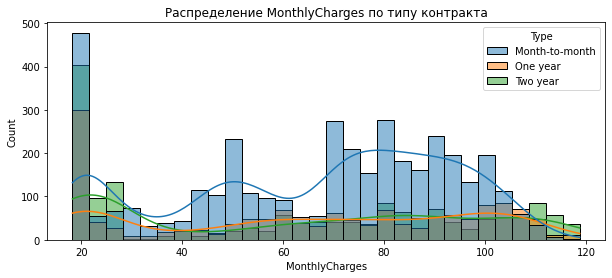

In [12]:
plt.figure(figsize=(10, 4))
sns.histplot(data=contract, x='MonthlyCharges', bins=30, kde=True, hue='Type')
plt.title(f'Распределение MonthlyCharges по типу контракта')
plt.show()

Контракты "Month-to-month": В этой категории наблюдается широкое распределение ежемесячных платежей с несколькими пиками, что скорей всего связано с корреляцией доп услуг друг с другом, то есть если пользователь взял одну услугу то он возьмет и другую.

Годовые и двух-годовые контракты: Распределены достаточно равномерное, можно сказать, что такие контракты предпочитают пользователи пользующиеся большим диапазоном услуг с общей стоимостью ежемесячного платежа выше средней.

Около 1/7 ото всех контрактов - пользуются минимумом услуг.

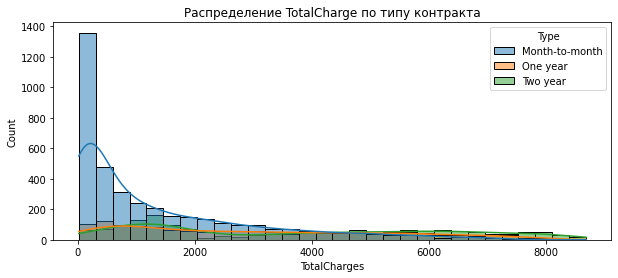

In [13]:
plt.figure(figsize=(10, 4))
sns.histplot(data=contract, x='TotalCharges', bins=30, kde=True, hue='Type')
plt.title(f'Распределение TotalCharge по типу контракта')
plt.show()

Контракты "Month-to-month": большинство клиентов данной категории не накопили больших суммарных расходов. Это может быть связано с меньшей продолжительностью использования услуг, или же тем, что при длительном пользовании клиенты стараются перейти на более выгодные типы контракта.

Годовые и двух-годовые контракты: Это распределение имеет куда менее резкий спад по сравнению с контрактами "Month-to-month", что говорит о том, что клиенты с такими контрактами имеют тенденцию накапливать более высокие суммарные расходы с течением времени.

По тому как распределен TotalCharge можно предположить что бизнес хоть и медленно, но стабильно формирует базу постоянных клиентов. Резкий спад говорит о том, что большую часть клиентов уходят после короткого срока пользования услугами.

Отдельно хочется посмотреть как целевой статус распределен на гистограмме totalcharges

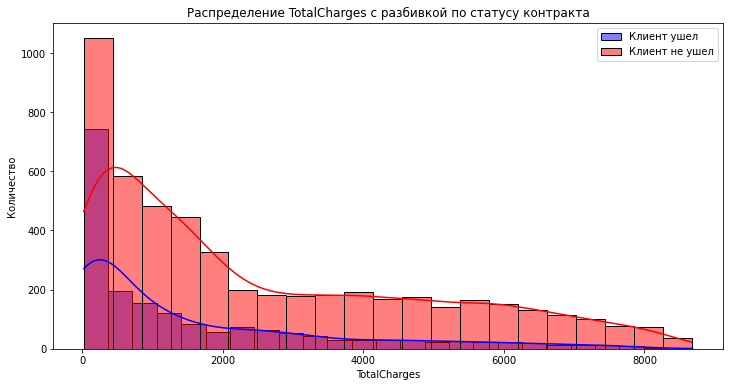

In [14]:
plt.figure(figsize=(12, 6))
# Распределение для неактивных контрактов
sns.histplot(contract[contract['leavingcustomer'] == 1]['TotalCharges'], color="blue", label='Клиент ушел', kde=True)
# Распределение для активных контрактов
sns.histplot(contract[contract['leavingcustomer'] == 0]['TotalCharges'], color="red", label='Клиент не ушел', kde=True)
plt.title('Распределение TotalCharges с разбивкой по статусу контракта')
plt.xlabel('TotalCharges')
plt.ylabel('Количество')
plt.legend()
plt.show()


Активные контракты: На гистограмме видно большое количество активных контрактов, сосредоточенных в нижней части общей суммы расходов. Это указывает на то, что значительная часть активных клиентов является относительно новыми или имеет более дешевые планы обслуживания. Разброс активных контрактов по всем диапазонам общей стоимости также свидетельствует о здоровом сочетании как новых, так и давних клиентов.

Неактивные контракты : Заметное количество неактивных контрактов также наблюдается в нижней части общей суммы расходов, что может означать, что значительное количество клиентов прекращают обслуживание на ранних этапах. Меньшее количество неактивных контрактов при более высоких суммарных расходах может говорить о том, что клиенты с более высокими суммарными расходами менее склонны к уходу, возможно, из-за более высоких инвестиций или удовлетворенности услугой.

Удержание и отток клиентов: Резкий спад после первоначального пика неактивных контрактов говорит о высоком уровне оттока новых клиентов или клиентов с более низкой общей суммой расходов. На этом можно сосредоточить внимание при совершенствовании стратегий удержания клиентов.

### personal

In [15]:
data_overview(personal, 'personal')

Обзор данных personal:


gender  SeniorCitizen Partner Dependents
customerID                                          
7590-VHVEG  Female              0     Yes         No
5575-GNVDE    Male              0      No         No
3668-QPYBK    Male              0      No         No
7795-CFOCW    Male              0      No         No
9237-HQITU  Female              0      No         No

Размеры: (7032, 4)
Типы данных:


gender           object
SeniorCitizen     int64
Partner          object
Dependents       object
dtype: object

Основные статистики:


SeniorCitizen
count    7032.000000
mean        0.162400
std         0.368844
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000

Пропущенные значения:


gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

Дубликаты: 7016
Примеры дубликатов:


gender  SeniorCitizen Partner Dependents
customerID                                          
3668-QPYBK    Male              0      No         No
7795-CFOCW    Male              0      No         No
9305-CDSKC  Female              0      No         No
6713-OKOMC  Female              0      No         No
7892-POOKP  Female              0     Yes         No

Уникальные значения в каждом столбце:
gender: 2 уникальных значений. Примеры: ['Female' 'Male']
SeniorCitizen: 2 уникальных значений. Примеры: [0 1]
Partner: 2 уникальных значений. Примеры: ['Yes' 'No']
Dependents: 2 уникальных значений. Примеры: ['No' 'Yes']




Датафрейм personal содержит 4 признака и 7043 объекта.

На основании примененной функции предпримем следующие шаги для датафрейма personal

- Изменение типа данных
- Уделить внимание дубликатам при будущем объединении данных.
- Провести анализ распределения значений в категориальных переменных *после объединения данных* для наглядного представления распределений и взаимосвязей, так же исследовать столбца `SeniorCitizen` для выявления возможных закономерностей в поведении пенсионеров.


In [16]:
# Преобразование значений 0 и 1 в 'No' и 'Yes' в столбце SeniorCitizen
personal['SeniorCitizen'] = personal['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

### internet

In [17]:
data_overview(internet, 'internet')

Обзор данных internet:


InternetService OnlineSecurity OnlineBackup DeviceProtection  \
customerID                                                                
7590-VHVEG             DSL             No          Yes               No   
5575-GNVDE             DSL            Yes           No              Yes   
3668-QPYBK             DSL            Yes          Yes               No   
7795-CFOCW             DSL            Yes           No              Yes   
9237-HQITU     Fiber optic             No           No               No   

           TechSupport StreamingTV StreamingMovies  
customerID                                          
7590-VHVEG          No          No              No  
5575-GNVDE          No          No              No  
3668-QPYBK          No          No              No  
7795-CFOCW         Yes          No              No  
9237-HQITU          No          No              No

Размеры: (5512, 7)
Типы данных:


InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
dtype: object

Основные статистики:


InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             5512           5512         5512             5512   
unique               2              2            2                2   
top        Fiber optic             No           No               No   
freq              3096           3497         3087             3094   

       TechSupport StreamingTV StreamingMovies  
count         5512        5512            5512  
unique           2           2               2  
top             No          No              No  
freq          3472        2809            2781

Пропущенные значения:


InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

Дубликаты: 5384
Примеры дубликатов:


InternetService OnlineSecurity OnlineBackup DeviceProtection  \
customerID                                                                
6388-TABGU             DSL            Yes          Yes               No   
9763-GRSKD             DSL            Yes           No               No   
8091-TTVAX     Fiber optic             No           No              Yes   
6865-JZNKO             DSL            Yes          Yes               No   
8665-UTDHZ             DSL             No          Yes               No   

           TechSupport StreamingTV StreamingMovies  
customerID                                          
6388-TABGU          No          No              No  
9763-GRSKD          No          No              No  
8091-TTVAX          No         Yes             Yes  
6865-JZNKO          No          No              No  
8665-UTDHZ          No          No              No

Уникальные значения в каждом столбце:
InternetService: 2 уникальных значений. Примеры: ['DSL' 'Fiber optic']
OnlineSecurity: 2 уникальных значений. Примеры: ['No' 'Yes']
OnlineBackup: 2 уникальных значений. Примеры: ['Yes' 'No']
DeviceProtection: 2 уникальных значений. Примеры: ['No' 'Yes']
TechSupport: 2 уникальных значений. Примеры: ['No' 'Yes']
StreamingTV: 2 уникальных значений. Примеры: ['No' 'Yes']
StreamingMovies: 2 уникальных значений. Примеры: ['No' 'Yes']




Датафрейм internet содержит 7 признаков и 5517 объектов (меньше других потому что не все клиенты пользуются услугами)

На основе анализа можно рассмотреть следующие шаги:
* Исследовать распределение типов интернет-соединения (InternetService), чтобы понять, какой тип соединения более популярен среди клиентов.
* Проанализировать использование дополнительных услуг (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies), чтобы оценить, какие из них наиболее востребованы.
* Оценить, существует ли связь между типом интернет-соединения и использованием дополнительных услуг.
* Найденые дубликаты (5389 из 5517 записей) для данного дф являются одинаковым набором услуг, не трогаем их.
* Признаки InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV и StreamingMovies бинарные категориальные. Их требуется кодировать с методом OneHotEncoder (для «линейных» моделей) и OrdinalEncoder (для «деревянных» моделей) в Pipeline перед обучением модели.  

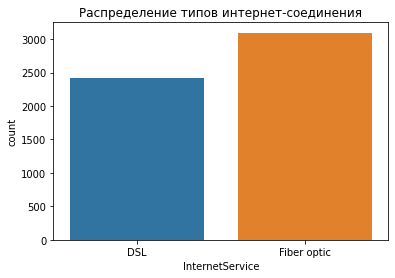

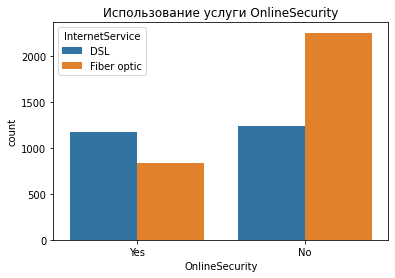

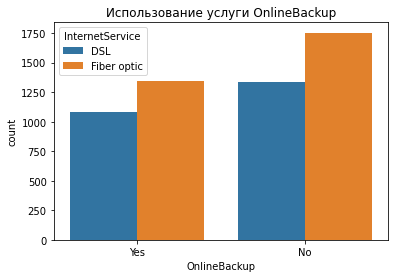

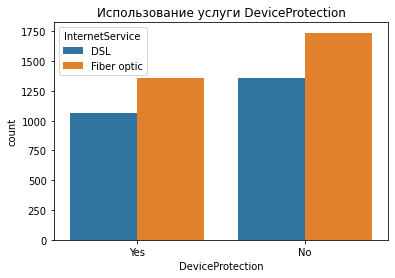

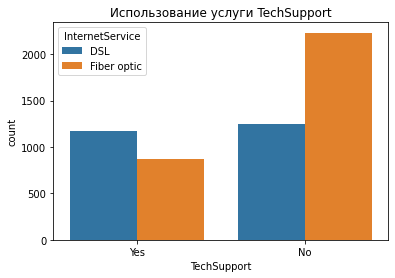

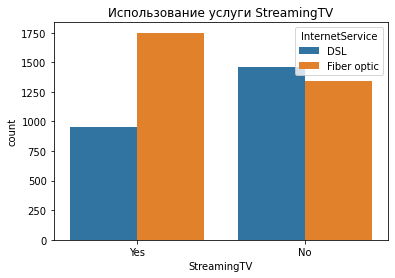

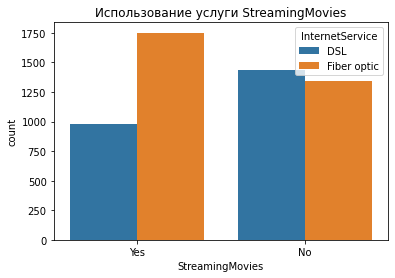

In [18]:
# Исследуем распределение типов интернет-соединения
sns.countplot(x='InternetService', data=internet)
plt.title('Распределение типов интернет-соединения')
plt.show()

# Проанализируем использование дополнительных услуг
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for service in services:
    sns.countplot(x=service, hue='InternetService', data=internet, order=['Yes', 'No'])
    plt.title(f'Использование услуги {service}')
    plt.show()

На основе представленной серии гистограмм по интернет-услугам и дополнительным функциям можно сделать четыре ключевых вывода:

Предпочтение оптоволокну: Среди клиентов, подписавшихся на дополнительные услуги, наблюдается явное предпочтение оптоволоконного интернета по сравнению с DSL, что указывает на то, что пользователи оптоволоконного интернета могут ценить или требовать более продвинутых функций.

Тенденция к дополнительным услугам: Клиенты, пользующиеся оптоволоконными услугами, чаще подписываются на дополнительные функции, такие как онлайн-безопасность, резервное копирование и защита устройств, чем пользователи DSL. Это может свидетельствовать о том, что пользователи оптоволоконных сетей более ориентированы на технологии или испытывают большую потребность в этих услугах.

Техническая поддержка: Доля клиентов, подписывающихся на техподдержку, ниже у пользователей оптоволокна. Это можно связать с тем, что с оптоволокном возникает меньше проблем, так как его устанавливают при перспективах долгосрочной экспуатации оборудованием, большим количеством пользователей на долгое время, во всех остальных случаях ставят DSL.

Популярность потоковых сервисов: Значительное число пользователей оптоволокна также подписываются на услуги потокового телевидения и кино, что может быть связано с более высокой пропускной способностью оптоволоконных соединений, которая улучшает качество потокового вещания.

Эти наблюдения могут быть полезны для разработки маркетинговых стратегий, улучшения комплектации услуг и понимания предпочтений клиентов в зависимости от типа используемых ими интернет-услуг.

### phone

In [19]:
data_overview(phone, 'phone')

Обзор данных phone:


MultipleLines
customerID              
5575-GNVDE            No
3668-QPYBK            No
9237-HQITU            No
9305-CDSKC           Yes
1452-KIOVK           Yes

Размеры: (6352, 1)
Типы данных:


MultipleLines    object
dtype: object

Основные статистики:


MultipleLines
count           6352
unique             2
top               No
freq            3385

Пропущенные значения:


MultipleLines    0
dtype: int64

Дубликаты: 6350
Примеры дубликатов:


MultipleLines
customerID              
3668-QPYBK            No
9237-HQITU            No
1452-KIOVK           Yes
7892-POOKP           Yes
6388-TABGU            No

Уникальные значения в каждом столбце:
MultipleLines: 2 уникальных значений. Примеры: ['No' 'Yes']




Датафрейм phone_new содержит 2 признака и 6361 объект.

Датафрейм не содержит пропусков.

## Шаг. Объединение данных

Объединим таблицы

In [20]:
## Объединяем contract и personal
merged_df = pd.merge(contract, personal, on='customerID', how='left')

# Добавляем данные об интернет-услугах
merged_df = pd.merge(merged_df, internet, on='customerID', how='left')

# Добавляем информацию о телефонии и создаем индикатор
merged_df = pd.merge(merged_df, phone, on='customerID', how='left', indicator='phone_indicator')
merged_df['phone_service'] = merged_df['phone_indicator'].apply(lambda x: 'Yes' if x == 'both' else 'No')
merged_df.drop(columns='phone_indicator', inplace=True)

# Проверяем результат

print(merged_df.shape)
print(merged_df.info)
merged_df.head()

(7032, 22)
<bound method DataFrame.info of             BeginDate    EndDate            Type PaperlessBilling  \
customerID                                                          
7590-VHVEG 2020-01-01        NaT  Month-to-month              Yes   
5575-GNVDE 2017-04-01        NaT        One year               No   
3668-QPYBK 2019-10-01 2019-12-01  Month-to-month              Yes   
7795-CFOCW 2016-05-01        NaT        One year               No   
9237-HQITU 2019-09-01 2019-11-01  Month-to-month              Yes   
...               ...        ...             ...              ...   
6840-RESVB 2018-02-01        NaT        One year              Yes   
2234-XADUH 2014-02-01        NaT        One year              Yes   
4801-JZAZL 2019-03-01        NaT  Month-to-month              Yes   
8361-LTMKD 2019-07-01 2019-11-01  Month-to-month              Yes   
3186-AJIEK 2014-08-01        NaT        Two year              Yes   

                        PaymentMethod  MonthlyCharges  Tota

BeginDate    EndDate            Type PaperlessBilling  \
customerID                                                          
7590-VHVEG 2020-01-01        NaT  Month-to-month              Yes   
5575-GNVDE 2017-04-01        NaT        One year               No   
3668-QPYBK 2019-10-01 2019-12-01  Month-to-month              Yes   
7795-CFOCW 2016-05-01        NaT        One year               No   
9237-HQITU 2019-09-01 2019-11-01  Month-to-month              Yes   

                        PaymentMethod  MonthlyCharges  TotalCharges  \
customerID                                                            
7590-VHVEG           Electronic check           29.85         29.85   
5575-GNVDE               Mailed check           56.95       1889.50   
3668-QPYBK               Mailed check           53.85        108.15   
7795-CFOCW  Bank transfer (automatic)           42.30       1840.75   
9237-HQITU           Electronic check           70.70        151.65   

            leavingcustomer  ContractDuration  gender  ... Dependents  \
customerID                                             ...              
7590-VHVEG                0                31  Female  ...         No   
5575-GNVDE                0              1036    Male  ...         No   
3668-QPYBK                1                61    Male  ...         No   
7795-CFOCW                0              1371    Male  ...         No   
9237-HQITU                1                61  Female  ...         No   

           InternetService OnlineSecurity OnlineBackup DeviceProtection  \
customerID                                                                
7590-VHVEG             DSL             No          Yes               No   
5575-GNVDE             DSL            Yes           No              Yes   
3668-QPYBK             DSL            Yes          Yes               No   
7795-CFOCW             DSL            Yes           No              Yes   
9237-HQITU     Fiber optic             No           No               No   

           TechSupport StreamingTV StreamingMovies MultipleLines phone_service  
customerID                                                                      
7590-VHVEG          No          No              No           NaN            No  
5575-GNVDE          No          No              No            No           Yes  
3668-QPYBK          No          No              No            No           Yes  
7795-CFOCW         Yes          No              No           NaN            No  
9237-HQITU          No          No              No            No           Yes  

[5 rows x 22 columns]

### Обработка пропусков

In [21]:
print(merged_df.isnull().sum())
print('contract:',contract.shape)
print('personal:',personal.shape)
print('internet:',internet.shape)
print('phone:',phone.shape)

BeginDate              0
EndDate             5163
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
leavingcustomer        0
ContractDuration       0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1520
OnlineSecurity      1520
OnlineBackup        1520
DeviceProtection    1520
TechSupport         1520
StreamingTV         1520
StreamingMovies     1520
MultipleLines        680
phone_service          0
dtype: int64
contract: (7032, 9)
personal: (7032, 4)
internet: (5512, 7)
phone: (6352, 1)


Поскольку мы соединяем датафреймы разной размерности, то при объединии методом left образуются пропуски в том случае, если индексу в левом датафрейме не соответствует ни однин индекс из правого. В нашем случае эти пропуски будут означать что клиет не пользуется данными услугами.

In [22]:
# Заполнение всех NaN значением "No" или np.nan в зависимости от типа данных столбца
for column in merged_df.columns:
    # Если столбец категориальный или строковый, заполняем "no"
    if merged_df[column].dtype == 'object':
        merged_df[column].fillna('No', inplace=True)
    # Для других типов данных используем np.nan
    else:
        merged_df[column].fillna(np.nan, inplace=True)

Отдельно стоит рассмотреть тот факт, что значение No уже присутствует в данных, например в phone['MultipleLines'], поскольку у нас есть столбец merged_df['phone_service'] в котором явно прописано пользуется или нет пользователь телефонией, при заполнении пропусков объединного датафрейма - в обоих случаях это будет означать одно и тоже.

## Шаг. Исследовательский анализ и предобработка объединённого датафрейма

Обзор данных merged_df:


BeginDate    EndDate            Type PaperlessBilling  \
customerID                                                          
7590-VHVEG 2020-01-01        NaT  Month-to-month              Yes   
5575-GNVDE 2017-04-01        NaT        One year               No   
3668-QPYBK 2019-10-01 2019-12-01  Month-to-month              Yes   
7795-CFOCW 2016-05-01        NaT        One year               No   
9237-HQITU 2019-09-01 2019-11-01  Month-to-month              Yes   

                        PaymentMethod  MonthlyCharges  TotalCharges  \
customerID                                                            
7590-VHVEG           Electronic check           29.85         29.85   
5575-GNVDE               Mailed check           56.95       1889.50   
3668-QPYBK               Mailed check           53.85        108.15   
7795-CFOCW  Bank transfer (automatic)           42.30       1840.75   
9237-HQITU           Electronic check           70.70        151.65   

            leavingcustomer  ContractDuration  gender  ... Dependents  \
customerID                                             ...              
7590-VHVEG                0                31  Female  ...         No   
5575-GNVDE                0              1036    Male  ...         No   
3668-QPYBK                1                61    Male  ...         No   
7795-CFOCW                0              1371    Male  ...         No   
9237-HQITU                1                61  Female  ...         No   

           InternetService OnlineSecurity OnlineBackup DeviceProtection  \
customerID                                                                
7590-VHVEG             DSL             No          Yes               No   
5575-GNVDE             DSL            Yes           No              Yes   
3668-QPYBK             DSL            Yes          Yes               No   
7795-CFOCW             DSL            Yes           No              Yes   
9237-HQITU     Fiber optic             No           No               No   

           TechSupport StreamingTV StreamingMovies MultipleLines phone_service  
customerID                                                                      
7590-VHVEG          No          No              No            No            No  
5575-GNVDE          No          No              No            No           Yes  
3668-QPYBK          No          No              No            No           Yes  
7795-CFOCW         Yes          No              No            No            No  
9237-HQITU          No          No              No            No           Yes  

[5 rows x 22 columns]

Размеры: (7032, 22)
Типы данных:


BeginDate           datetime64[ns]
EndDate             datetime64[ns]
Type                        object
PaperlessBilling            object
PaymentMethod               object
MonthlyCharges             float64
TotalCharges               float64
leavingcustomer              int64
ContractDuration             int64
gender                      object
SeniorCitizen               object
Partner                     object
Dependents                  object
InternetService             object
OnlineSecurity              object
OnlineBackup                object
DeviceProtection            object
TechSupport                 object
StreamingTV                 object
StreamingMovies             object
MultipleLines               object
phone_service               object
dtype: object

Основные статистики:


MonthlyCharges  TotalCharges  leavingcustomer  ContractDuration
count     7032.000000   7032.000000      7032.000000       7032.000000
mean        64.798208   2283.300441         0.265785        987.538538
std         30.085974   2266.771362         0.441782        747.153663
min         18.250000     18.800000         0.000000         30.000000
25%         35.587500    401.450000         0.000000        275.000000
50%         70.350000   1397.475000         0.000000        883.000000
75%         89.862500   3794.737500         1.000000       1676.000000
max        118.750000   8684.800000         1.000000       2191.000000

Пропущенные значения:


BeginDate              0
EndDate             5163
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
leavingcustomer        0
ContractDuration       0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
MultipleLines          0
phone_service          0
dtype: int64

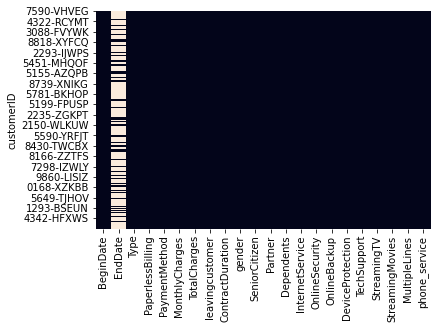

Дубликаты: 13
Примеры дубликатов:


BeginDate    EndDate            Type PaperlessBilling  \
customerID                                                          
8605-ITULD 2020-01-01        NaT  Month-to-month               No   
3247-MHJKM 2020-01-01        NaT  Month-to-month               No   
5996-DAOQL 2020-01-01        NaT  Month-to-month              Yes   
2668-TZSPS 2020-01-01        NaT  Month-to-month               No   
2636-ALXXZ 2019-12-01 2020-01-01  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges  TotalCharges  leavingcustomer  \
customerID                                                                    
8605-ITULD      Mailed check           19.55         19.55                0   
3247-MHJKM      Mailed check           20.20         20.20                0   
5996-DAOQL      Mailed check           20.45         20.45                0   
2668-TZSPS      Mailed check           20.45         20.45                0   
2636-ALXXZ  Electronic check           69.60         69.60                1   

            ContractDuration  gender  ... Dependents InternetService  \
customerID                            ...                              
8605-ITULD                31  Female  ...         No              No   
3247-MHJKM                31    Male  ...         No              No   
5996-DAOQL                31    Male  ...         No              No   
2668-TZSPS                31    Male  ...         No              No   
2636-ALXXZ                31  Female  ...         No     Fiber optic   

           OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
customerID                                                            
8605-ITULD             No           No               No          No   
3247-MHJKM             No           No               No          No   
5996-DAOQL             No           No               No          No   
2668-TZSPS             No           No               No          No   
2636-ALXXZ             No           No               No          No   

           StreamingTV StreamingMovies MultipleLines phone_service  
customerID                                                          
8605-ITULD          No              No            No           Yes  
3247-MHJKM          No              No            No           Yes  
5996-DAOQL          No              No            No           Yes  
2668-TZSPS          No              No            No           Yes  
2636-ALXXZ          No              No            No           Yes  

[5 rows x 22 columns]

Уникальные значения в каждом столбце:
BeginDate: 76 уникальных значений. Примеры: ['2020-01-01T00:00:00.000000000' '2017-04-01T00:00:00.000000000'
 '2019-10-01T00:00:00.000000000' '2016-05-01T00:00:00.000000000'
 '2019-09-01T00:00:00.000000000']
EndDate: 4 уникальных значений. Примеры: [                          'NaT' '2019-12-01T00:00:00.000000000'
 '2019-11-01T00:00:00.000000000' '2019-10-01T00:00:00.000000000'
 '2020-01-01T00:00:00.000000000']
Type: 3 уникальных значений. Примеры: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: 2 уникальных значений. Примеры: ['Yes' 'No']
PaymentMethod: 4 уникальных значений. Примеры: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: 1584 уникальных значений. Примеры: [29.85 56.95 53.85 42.3  70.7 ]
TotalCharges: 6530 уникальных значений. Примеры: [  29.85 1889.5   108.15 1840.75  151.65]
leavingcustomer: 2 уникальных значений. Примеры: [0 1]
ContractDuration: 155 уникальных значени

In [23]:
data_overview(merged_df, 'merged_df')

Исходя из анализа можно предпринять следующие шаги:

* привести названия всех столбцов к змеиному стилю
* исследовать MonthlyCharges,ContractDuration и TotalCharges на наличие аномалий или выбросов, провести анализ распределения целевого признака, изучить взаимосвязи
* выполнить корреляционный анализ данных
* исследовать баланс классов
* рассмотреть дубликаты


In [24]:
# Преобразование названий столбцов к змеиному стилю
merged_df.columns = [column.lower().replace(' ', '_') for column in merged_df.columns]


In [25]:
duplicates = merged_df[merged_df.duplicated()]
duplicates


begindate    enddate            type paperlessbilling  \
customerID                                                          
8605-ITULD 2020-01-01        NaT  Month-to-month               No   
3247-MHJKM 2020-01-01        NaT  Month-to-month               No   
5996-DAOQL 2020-01-01        NaT  Month-to-month              Yes   
2668-TZSPS 2020-01-01        NaT  Month-to-month               No   
2636-ALXXZ 2019-12-01 2020-01-01  Month-to-month              Yes   
7096-UCLNH 2020-01-01        NaT  Month-to-month               No   
8048-DSDFQ 2020-01-01        NaT  Month-to-month               No   
8749-CLJXC 2020-01-01        NaT  Month-to-month               No   
2676-ISHSF 2020-01-01        NaT  Month-to-month               No   
1000-AJSLD 2019-10-01 2019-11-01  Month-to-month              Yes   
7878-RTCZG 2020-01-01        NaT  Month-to-month               No   
0970-QXPXW 2020-01-01        NaT  Month-to-month               No   
6457-GIRWB 2019-10-01 2019-11-01  Month-to-month              Yes   

               paymentmethod  monthlycharges  totalcharges  leavingcustomer  \
customerID                                                                    
8605-ITULD      Mailed check           19.55         19.55                0   
3247-MHJKM      Mailed check           20.20         20.20                0   
5996-DAOQL      Mailed check           20.45         20.45                0   
2668-TZSPS      Mailed check           20.45         20.45                0   
2636-ALXXZ  Electronic check           69.60         69.60                1   
7096-UCLNH      Mailed check           20.05         20.05                0   
8048-DSDFQ      Mailed check           20.20         20.20                0   
8749-CLJXC      Mailed check           20.05         20.05                0   
2676-ISHSF      Mailed check           20.30         20.30                0   
1000-AJSLD      Mailed check           20.10         20.10                1   
7878-RTCZG      Mailed check           19.90         19.90                0   
0970-QXPXW      Mailed check           19.65         19.65                0   
6457-GIRWB  Electronic check           69.35         69.35                1   

            contractduration  gender  ... dependents internetservice  \
customerID                            ...                              
8605-ITULD                31  Female  ...         No              No   
3247-MHJKM                31    Male  ...         No              No   
5996-DAOQL                31    Male  ...         No              No   
2668-TZSPS                31    Male  ...         No              No   
2636-ALXXZ                31  Female  ...         No     Fiber optic   
7096-UCLNH                31    Male  ...         No              No   
8048-DSDFQ                31    Male  ...         No              No   
8749-CLJXC                31    Male  ...         No              No   
2676-ISHSF                31    Male  ...         No              No   
1000-AJSLD                31    Male  ...         No              No   
7878-RTCZG                31  Female  ...         No              No   
0970-QXPXW                31  Female  ...         No              No   
6457-GIRWB                31    Male  ...         No     Fiber optic   

           onlinesecurity onlinebackup deviceprotection techsupport  \
customerID                                                            
8605-ITULD             No           No               No          No   
3247-MHJKM             No           No               No          No   
5996-DAOQL             No           No               No          No   
2668-TZSPS             No           No               No          No   
2636-ALXXZ             No           No               No          No   
7096-UCLNH             No           No               No          No   
8048-DSDFQ             No           No               No          No   
8749-CLJXC             No           No               No          No   

Одинаковая Длительность Контракта: Все дубликаты указывают на контракты с одномесячной длительностью. Это может указывать на то, что данные строки представляют клиентов с коротким сроком обслуживания или новых клиентов.

Минимальный Набор Услуг: В этих записях преобладает минимальный набор услуг, что может указывать на стандартный пакет для новых или экономных клиентов.

Схожие Платежные Методы и Цены: Большинство дубликатов используют одинаковые методы оплаты (например, "Mailed check") и имеют схожие ежемесячные и общие платежи, что подчёркивает их стандартность.

Эти наблюдения могут указывать на то, что дубликаты не являются результатом ошибок в данных, а скорее отражают определённую группу клиентов с похожими характеристиками контрактов.

Мы сформировали столбец contractduration, поэтому можем избавиться от некоторых признаков

In [26]:
del merged_df['begindate'], merged_df['enddate']

### Анализ распределения 

#### для числовых признаков


Рассмотрим как целевой признак распределен в числовых признаках

клиент ушел - 1

клиент не ушел - 0

In [27]:
def plot_distribution_and_boxplot(df, column):
    plt.figure(figsize=(12, 6))

    # Боксплот по статусу контракта
    plt.subplot(1, 2, 1)
    sns.boxplot(x='leavingcustomer', y=column, data=df)
    plt.title(f'Boxplot of {column} by Contract Status')

    # Гистограмма распределения по статусу контракта
    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x=column, hue='leavingcustomer',hue_order=[1, 0], bins=50, kde=True)
    plt.title(f'Distribution of {column} by Contract Status')

    plt.show()

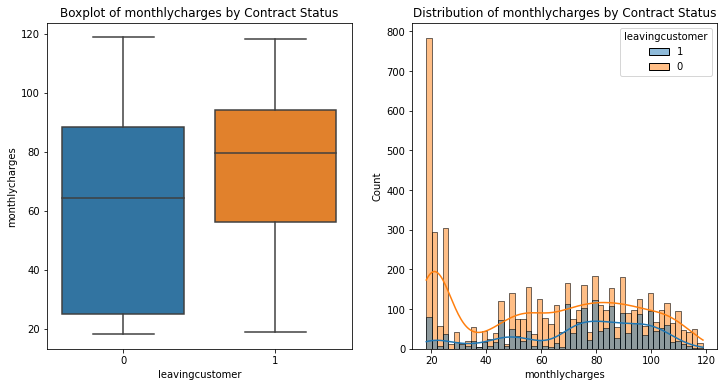

In [28]:
plot_distribution_and_boxplot(merged_df, 'monthlycharges')

In [29]:
class0 = merged_df[merged_df['leavingcustomer'] == 1].shape[0]
inactive_contracts_count = merged_df[(merged_df['monthlycharges'] > 65) & (merged_df['leavingcustomer'] == 1)].shape[0]

print(f"Общее количество ушедних клиентов: {class0}")
print(f"Количество неактивных пользователй с ежемесячной платой больше средней: {inactive_contracts_count}")
print(f"Процент неактивных выше выбранного порога ежемесячной платы: {(inactive_contracts_count / class0) * 100}")

Общее количество ушедних клиентов: 1869
Количество неактивных пользователй с ежемесячной платой больше средней: 1354
Процент неактивных выше выбранного порога ежемесячной платы: 72.44515783841626


* Более 70 процентов расторгнутых контрактов приходятся на ежемесячную плату выше средней.

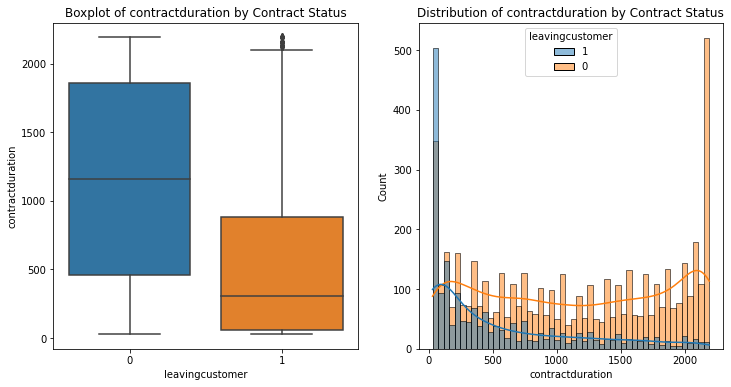

In [30]:
plot_distribution_and_boxplot(merged_df, 'contractduration')

In [31]:
class0 = merged_df[merged_df['leavingcustomer'] == 1].shape[0]
inactive_contracts_count = merged_df[(merged_df['contractduration'] < 310) & (merged_df['leavingcustomer'] == 1)].shape[0]

print(f"Общее количество клиентов 0: {class0}")
print(f"Количество неактивных пользователй с общей длительностью контракта меньше 360: {inactive_contracts_count}")
print(f"Процент неактивных ниже выбранного порога затрат: {(inactive_contracts_count / class0) * 100}")

Общее количество клиентов 0: 1869
Количество неактивных пользователй с общей длительностью контракта меньше 360: 968
Процент неактивных ниже выбранного порога затрат: 51.79240235420011


* Более половины контрактов разрываются в течении первых 10 месяцев.

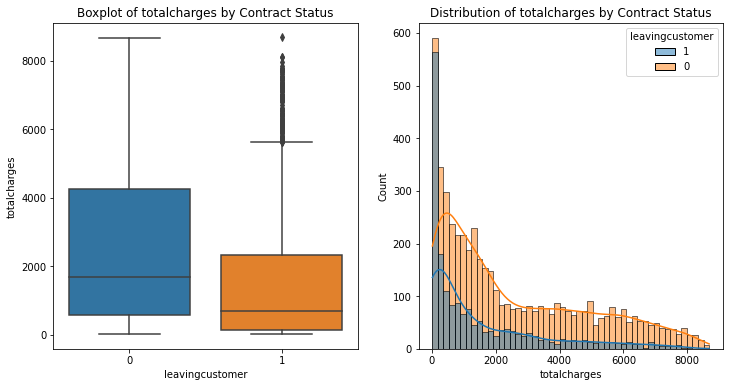

In [32]:
plot_distribution_and_boxplot(merged_df, 'totalcharges')

In [33]:
class0 = merged_df[merged_df['leavingcustomer'] == 1].shape[0]
inactive_contracts_count = merged_df[(merged_df['totalcharges'] < 710) & (merged_df['leavingcustomer'] == 1)].shape[0]

print(f"Общее количество клиентов 0: {class0}")
print(f"Количество неактивных контрактов с общими затратами менее 710: {inactive_contracts_count}")
print(f"Процент неактивных ниже выбранного порога затрат: {(inactive_contracts_count / class0) * 100}")

Общее количество клиентов 0: 1869
Количество неактивных контрактов с общими затратами менее 710: 937
Процент неактивных ниже выбранного порога затрат: 50.133761369716424


* Половина всех расторжений происходит до достижения общей суммы расходов 710

Ближе рассмотри два пика в contractduration.
Давайте напишем код для анализа данных на концах распределения, чтобы понять, что происходит с клиентами с очень короткими и очень длинными сроками договора. Мы будем использовать квантили для определения пороговых значений и исследования значений за пределами этих порогов.
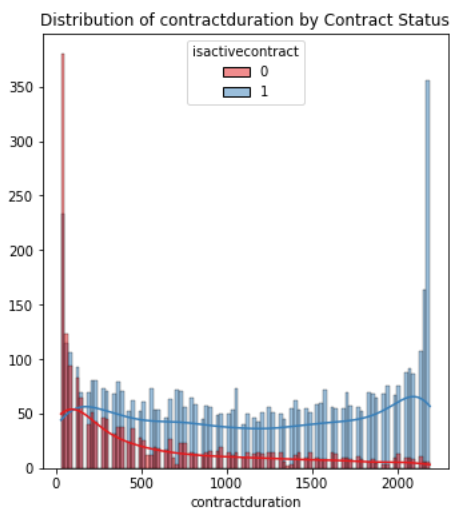

In [34]:
# Определение порога для продолжительности контракта, считающегося аномальным
lower_threshold = merged_df['contractduration'].quantile(0.10)
upper_threshold  = merged_df['contractduration'].quantile(0.90)

# Отфильтровываем клиентов с продолжительностью контракта выше порога
short_duration_customers = merged_df[merged_df['contractduration'] < lower_threshold]
long_duration_customers = merged_df[merged_df['contractduration'] > upper_threshold]

In [35]:
print("Клиенты с аномально короткой продолжительностью контракта:")
short_duration_customers

Клиенты с аномально короткой продолжительностью контракта:


type paperlessbilling              paymentmethod  \
customerID                                                               
7590-VHVEG  Month-to-month              Yes           Electronic check   
8779-QRDMV  Month-to-month              Yes           Electronic check   
1066-JKSGK  Month-to-month               No               Mailed check   
8665-UTDHZ  Month-to-month               No           Electronic check   
7310-EGVHZ  Month-to-month               No  Bank transfer (automatic)   
...                    ...              ...                        ...   
5351-QESIO  Month-to-month               No               Mailed check   
0723-DRCLG  Month-to-month              Yes           Electronic check   
1471-GIQKQ  Month-to-month               No           Electronic check   
1122-JWTJW  Month-to-month              Yes               Mailed check   
6894-LFHLY  Month-to-month              Yes           Electronic check   

            monthlycharges  totalcharges  leavingcustomer  contractduration  \
customerID                                                                    
7590-VHVEG           29.85         29.85                0                31   
8779-QRDMV           39.65         39.65                1                30   
1066-JKSGK           20.15         20.15                1                30   
8665-UTDHZ           30.20         30.20                1                30   
7310-EGVHZ           20.20         20.20                0                31   
...                    ...           ...              ...               ...   
5351-QESIO           24.20         24.20                0                31   
0723-DRCLG           74.45         74.45                1                30   
1471-GIQKQ           49.95         49.95                0                31   
1122-JWTJW           70.65         70.65                1                31   
6894-LFHLY           75.75         75.75                1                31   

            gender seniorcitizen partner dependents internetservice  \
customerID                                                            
7590-VHVEG  Female            No     Yes         No             DSL   
8779-QRDMV    Male           Yes      No         No             DSL   
1066-JKSGK    Male            No      No         No              No   
8665-UTDHZ    Male            No     Yes        Yes             DSL   
7310-EGVHZ    Male            No      No         No              No   
...            ...           ...     ...        ...             ...   
5351-QESIO    Male            No      No        Yes             DSL   
0723-DRCLG  Female           Yes     Yes         No     Fiber optic   
1471-GIQKQ  Female            No      No         No             DSL   
1122-JWTJW    Male            No     Yes        Yes     Fiber optic   
6894-LFHLY    Male           Yes      No         No     Fiber optic   

           onlinesecurity onlinebackup deviceprotection techsupport  \
customerID                                                            
7590-VHVEG             No          Yes               No          No   
8779-QRDMV             No           No              Yes          No   
1066-JKSGK             No           No               No          No   
8665-UTDHZ             No          Yes               No          No   
7310-EGVHZ             No           No               No          No   
...                   ...          ...              ...         ...   
5351-QESIO             No           No               No          No   
0723-DRCLG             No           No               No          No   
1471-GIQKQ             No          Yes               No          No   
1122-JWTJW             No           No               No          No   
6894-LFHLY             No           No               No          No   

           streamingtv streamingmovies multiplelines phone_service  
customerID                                                          
7590-VHVEG          No              No       

In [36]:
print("Клиенты с аномально длинной продолжительностью контракта:")
long_duration_customers

Клиенты с аномально длинной продолжительностью контракта:


type paperlessbilling              paymentmethod  \
customerID                                                         
9959-WOFKT  Two year               No  Bank transfer (automatic)   
5248-YGIJN  Two year              Yes    Credit card (automatic)   
3841-NFECX  Two year              Yes    Credit card (automatic)   
6234-RAAPL  Two year               No  Bank transfer (automatic)   
9489-DEDVP  Two year              Yes    Credit card (automatic)   
...              ...              ...                        ...   
0218-QNVAS  One year               No  Bank transfer (automatic)   
2274-XUATA  Two year              Yes  Bank transfer (automatic)   
7203-OYKCT  One year              Yes           Electronic check   
2569-WGERO  Two year              Yes  Bank transfer (automatic)   
2234-XADUH  One year              Yes    Credit card (automatic)   

            monthlycharges  totalcharges  leavingcustomer  contractduration  \
customerID                                                                    
9959-WOFKT          106.70       7382.25                0              2163   
5248-YGIJN           90.25       6369.45                0              2191   
3841-NFECX           96.35       6766.95                0              2163   
6234-RAAPL           99.90       7251.70                0              2191   
9489-DEDVP           69.20       4872.35                0              2132   
...                    ...           ...              ...               ...   
0218-QNVAS          100.55       7113.75                0              2163   
2274-XUATA           63.10       4685.55                0              2191   
7203-OYKCT          104.95       7544.30                0              2191   
2569-WGERO           21.15       1419.40                0              2191   
2234-XADUH          103.20       7362.90                0              2191   

            gender seniorcitizen partner dependents internetservice  \
customerID                                                            
9959-WOFKT    Male            No      No        Yes     Fiber optic   
5248-YGIJN    Male            No     Yes         No             DSL   
3841-NFECX  Female           Yes     Yes         No     Fiber optic   
6234-RAAPL  Female            No     Yes        Yes     Fiber optic   
9489-DEDVP  Female            No     Yes        Yes             DSL   
...            ...           ...     ...        ...             ...   
0218-QNVAS    Male            No     Yes        Yes     Fiber optic   
2274-XUATA    Male           Yes     Yes         No             DSL   
7203-OYKCT    Male            No      No         No     Fiber optic   
2569-WGERO  Female            No      No         No              No   
2234-XADUH  Female            No     Yes        Yes     Fiber optic   

           onlinesecurity onlinebackup deviceprotection techsupport  \
customerID                                                            
9959-WOFKT            Yes           No              Yes          No   
5248-YGIJN            Yes          Yes              Yes         Yes   
3841-NFECX            Yes          Yes              Yes         Yes   
6234-RAAPL            Yes          Yes               No         Yes   
9489-DEDVP            Yes          Yes               No          No   
...                   ...          ...              ...         ...   
0218-QNVAS             No          Yes               No          No   
2274-XUATA            Yes          Yes              Yes         Yes   
7203-OYKCT             No          Yes              Yes          No   
2569-WGERO             No           No               No          No   
2234-XADUH             No          Yes              Yes          No   

           streamingtv streamingmovies multiplelines phone_service  
customerID                                                          
9959-WOFKT         Yes             Yes           Yes           Yes  
5248-YGIJN         Yes             Yes          

In [37]:
class0 = merged_df[merged_df['leavingcustomer'] == 1].shape[0]
# Фильтрация DataFrame для поиска клиентов с неактивным контрактом и типом "Month-to-month"
month_to_month_inactive = merged_df[(merged_df['leavingcustomer'] == 1) & (merged_df['type'] == 'Month-to-month')].shape[0]

print(f"Общее количество ушедших клиентов: {class0}")
print(f"Количество клиентов с неактивным контрактом 'Month-to-month': {month_to_month_inactive}")
print(f"Доля ушедших клиентов с типом оплаты'Month-to-month': {(month_to_month_inactive / class0) * 100}")

Общее количество ушедших клиентов: 1869
Количество клиентов с неактивным контрактом 'Month-to-month': 1655
Доля ушедших клиентов с типом оплаты'Month-to-month': 88.55002675227395


* Почти 90% расторжения случаются у клиентов с типом оплаты Month-to-month

#### для категориальных

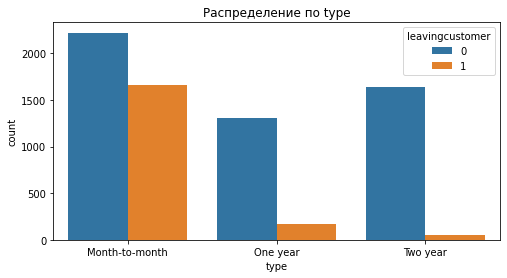

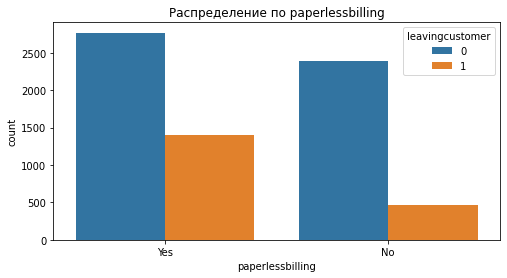

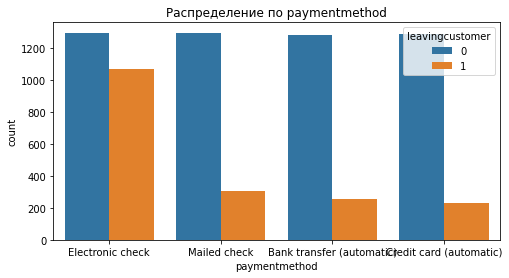

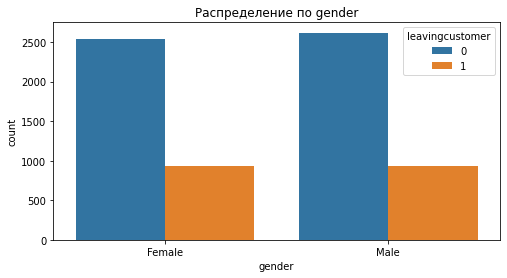

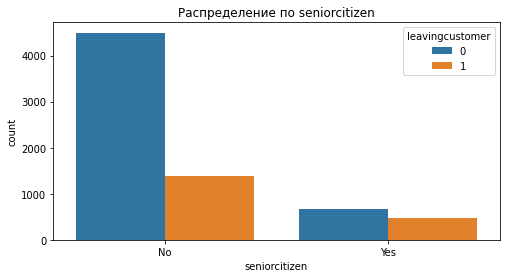

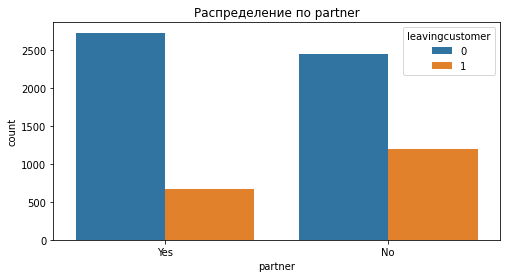

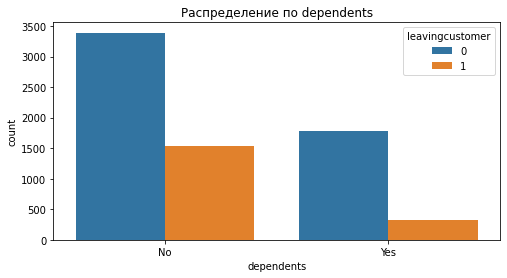

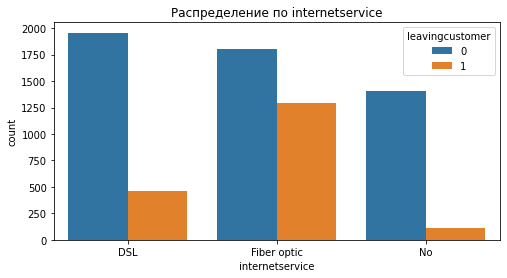

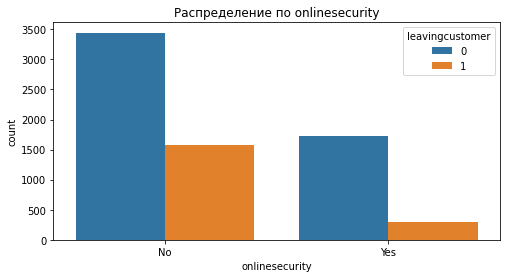

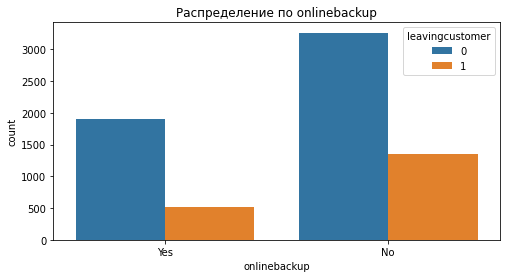

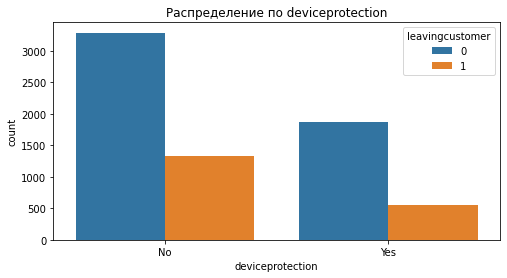

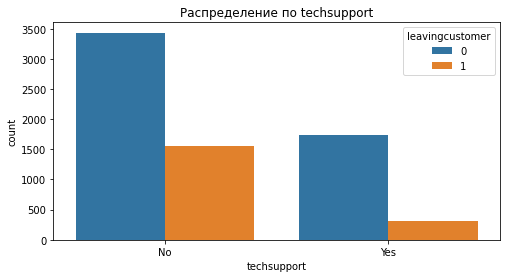

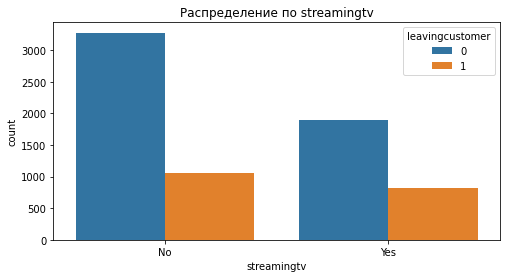

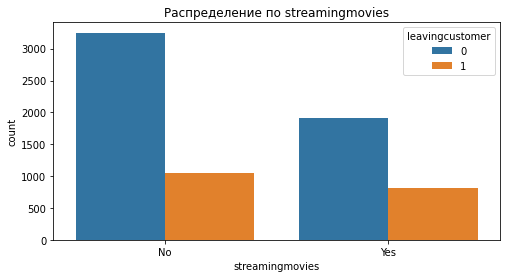

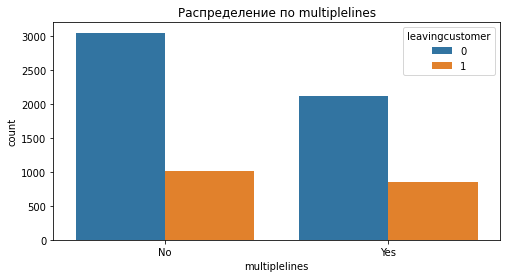

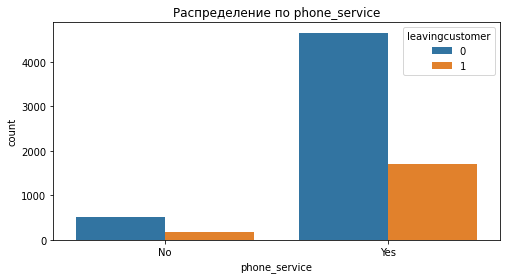

In [38]:
categorical_columns = merged_df.select_dtypes('object').columns

for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(x=column, hue='leavingcustomer', data=merged_df)
    plt.title(f'Распределение по {column}')
    plt.show()

- Большая часть расторгнутых контрактов приходится на тип оплаты month-to-month, в разделе 8.1 проверим гипотезу 'Ежемесячный тип оплаты чаще встречается среди расторгнутых контрактов'

- Большая часть расторгнутых контрактов происходит при использовании электронных расчётных листов.

- Большая часть расторгнутых контрактов происходит при использовании электронных чеков, вероятно людям которые используют альтернативные способы получения чеков - менее свойственно менять провайдера.

- Пенсионеры и супружеские пары гораздо чаще отказываются от услуг данного интернет провайдера, а клиенты с детьми - реже.

- Отток клиентов, использующих оптоволокно, очень высок. Это может быть связано с низким качеством связи, завышенными тарифами и большим количеством конкурентов, особенно в новых жилых комплексах. Клиенты который пользуются DSL или только телефоном - уходят гораздо реже.

- Чем большим количеством услуг пользуется клиент тем ниже шанс того что он уйдет, особенно если они пользуются TechSupport, но это нельзя сказать о стриминговых услугах, среди их пользоватлей большое количество ушедших клиентов, вероятно стоит проверить их качество.

### Анализ мультиколлинеарности 

Воспользуемся библиотекой phik - она подходит для анализа категориальных данных.

Чтобы учесть взаимосвязь между категориальными и числовыми признаками используем параметр interval_cols, для этого нужно выделить числовые столбцы:

In [39]:
num = ['monthlycharges', 'totalcharges', 'contractduration']

In [40]:
# Вычисляем матрицу корреляции с помощью phik
phik_corr = merged_df.phik_matrix(interval_cols=num)

phik_corr

type  paperlessbilling  paymentmethod  monthlycharges  \
type              1.000000          0.106151       0.277528        0.388379   
paperlessbilling  0.106151          1.000000       0.368945        0.467518   
paymentmethod     0.277528          0.368945       1.000000        0.398860   
monthlycharges    0.388379          0.467518       0.398860        1.000000   
totalcharges      0.507638          0.205050       0.349956        0.762975   
leavingcustomer   0.251283          0.295194       0.448559        0.359612   
contractduration  0.666958          0.000000       0.373584        0.409804   
gender            0.000000          0.000000       0.000000        0.006724   
seniorcitizen     0.085800          0.241715       0.291989        0.304252   
partner           0.179294          0.010489       0.244661        0.204269   
dependents        0.146126          0.170650       0.222859        0.182129   
internetservice   0.503776          0.231145       0.323013        0.918983   
onlinesecurity    0.152239          0.000000       0.261704        0.550865   
onlinebackup      0.099016          0.196937       0.282245        0.629309   
deviceprotection  0.137817          0.161234       0.306678        0.667827   
techsupport       0.180169          0.055354       0.270893        0.575850   
streamingtv       0.067123          0.344114       0.377241        0.835566   
streamingmovies   0.070375          0.325351       0.378375        0.833195   
multiplelines     0.065750          0.253299       0.339987        0.676744   
phone_service     0.000000          0.017239       0.000000        0.831671   

                  totalcharges  leavingcustomer  contractduration    gender  \
type                  0.507638         0.251283          0.666958  0.000000   
paperlessbilling      0.205050         0.295194          0.000000  0.000000   
paymentmethod         0.349956         0.448559          0.373584  0.000000   
monthlycharges        0.762975         0.359612          0.409804  0.006724   
totalcharges          1.000000         0.280973          0.842068  0.000000   
leavingcustomer       0.280973         1.000000          0.473761  0.000000   
contractduration      0.842068         0.473761          1.000000  0.000000   
gender                0.000000         0.000000          0.000000  1.000000   
seniorcitizen         0.148024         0.232897          0.028044  0.000000   
partner               0.424655         0.232215          0.492490  0.000000   
dependents            0.118247         0.252268          0.214108  0.000000   
internetservice       0.507972         0.195860          0.012927  0.000000   
onlinesecurity        0.545578         0.264645          0.425021  0.016788   
onlinebackup          0.656039         0.127052          0.466439  0.007277   
deviceprotection      0.672211         0.101565          0.467484  0.000000   
techsupport           0.567056         0.254678          0.424046  0.000000   
streamingtv           0.660452         0.096903          0.361518  0.000000   
streamingmovies       0.666068         0.093088          0.368627  0.000000   
multiplelines         0.606423         0.059462          0.433857  0.000000   
phone_service         0.197820         0.000000          0.000000  0.000000   

                  seniorcitizen   partner  dependents  internetservice  \
type                   0.085800  0.179294    0.146126         0.503776   
paperlessbilling       0.241715  0.010489    0.170650         0.231145   
paymentmethod          0.291989  0.244661    0.222859         0.323013   
monthlycharges         0.304252  0.204269    0.182129         0.918983   
totalcharges           0.148024  0.424655    0.118247         0.507972   
leavingcustomer        0.232897  0.232215    0.252268         0.195860   
contractduration       0.028044  0.492490    0.214108         0.012927   
gender                 0.000000  0.000000    0.000000         0.000000   
seniorcitizen          1.000000  0.0

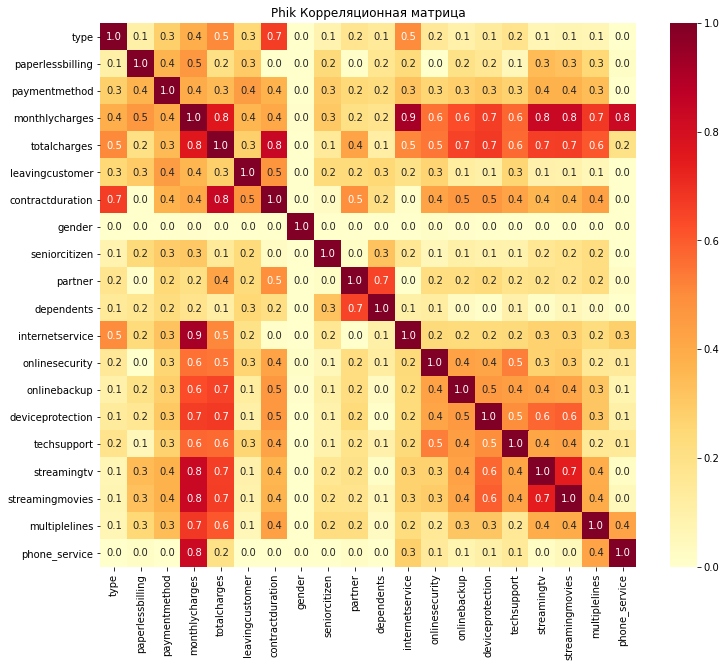

In [41]:
# Визуализируем матрицу корреляции с помощью тепловой карты
plt.figure(figsize=(12, 10))
sns.heatmap(phik_corr, annot=True, fmt=".1f", cmap='YlOrRd')
plt.title('Phik Корреляционная матрица')
plt.show()


- хотя корреляция между наличием услуг интернета и высокой месячной платой составляет 0.919, эту зависимость можно объяснить тем, что все дорогие услуги доступны именно пользователям интернета -можно предположить отсутствие мультиколлинеарности.
- наиболее заметные корреляции, такие как между totalcharges и contractduration или monthlycharges и internetservice, не превышают критически высоких значений. Это может указывать на то, что каждый признак вносит уникальный вклад в информацию, которую можно использовать для обучения модели.
- сильная зависимость между monthlycharges, totalcharges и услугами - что логично. 
- можно сделать вывод что чем дольше клиент пользуется услугами провайдера - тем выше шанс того что будет использовать доп услуги
- сильная корреляция между типом контратка и его длительностью, что соответствует наблюдениям в разделе 4.1.2
- высокий шанс что стриминговые услуги будут использованы в комплекте друг с другом

Целевой признак leavingcustomer: сильно коррелирует с contractduration и paymentmethod и практически не коррелирует с gender и phon servise. Последнее не обязательно означает, что их нужно удалять из модели, ведь они могут взаимодействовать с другими предикторами и неявно влиять на целевую переменную, так же они могут предоставлять важную дополнительную информацию для модели.

### Исследование баланса классов

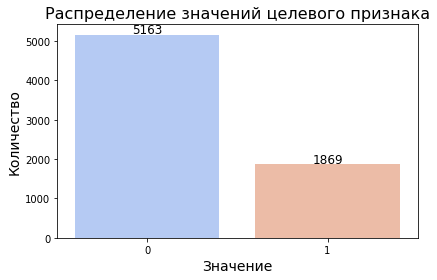

In [42]:
# Построим столбчатую диаграмму для целевого признака
ax = sns.countplot(x=merged_df['leavingcustomer'], palette='coolwarm')


ax.set_title('Распределение значений целевого признака', fontsize=16)
ax.set_xlabel('Значение', fontsize=14)
ax.set_ylabel('Количество', fontsize=14)

# Добавление аннотаций с количеством на каждый столбец
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

В нашей проектной работе мы будем пользоваться метрикой ROC-AUC. Эта метрика считается устойчивой к дисбалансу классов, так как она оценивает эффективность классификатора при различных пороговых значениях, выражая компромисс между долей истинно положительных результатов (TPR) и долей ложноположительных результатов (FPR). 

### Промежуточный вывод:

* Все пропуски и дубликаты обработаны или 'одобрены'.
* Добавлены новые столбцы, удалены не нужные.
* Тип данных приведен к необходимому.
* Аномалии рассмотрены.
* Все альтернативные гипотезы были приняты. 
* Мультиколлинеарности не обнаружено: Коэффициенты корреляции не достигают критических уровней, что указывает на отсутствие строгой мультиколлинеарности.
* Использование всех признаков: Поскольку нет доказательств мультиколлинеарности, все признаки могут быть использованы при обучении модели. Однако стоит отметить, что некоторые алгоритмы машинного обучения, такие как регуляризованные регрессии (L1, L2), могут лучше справляться с признаками, имеющими некоторую степень корреляции.
* Исследован баланс классов.

## Шаг. Подготовка данных для моделей машинного обучения

Перед разделением кодируем и нормализуем датасет.

In [43]:
features = merged_df.drop('leavingcustomer', axis=1) 
target = merged_df['leavingcustomer']

split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=RANDOM_STATE)


for train_index, test_index in split.split(features, target):
    features_train, features_test = features.iloc[train_index], features.iloc[test_index]
    target_train, target_test = target.iloc[train_index], target.iloc[test_index]


Проверем равномерно ли распределились сильно коррелирующие признаки.

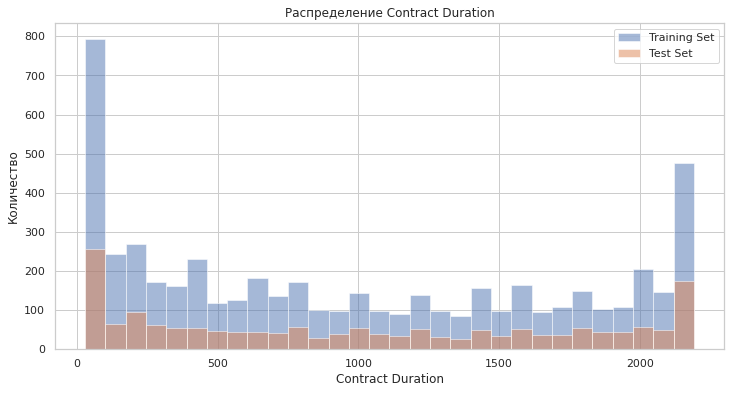

In [44]:
sns.set(style="whitegrid")
# Визуализация для contractduration
plt.figure(figsize=(12, 6))
plt.hist(features_train['contractduration'], bins=30, alpha=0.5, label='Training Set')
plt.hist(features_test['contractduration'], bins=30, alpha=0.5, label='Test Set')
plt.title('Распределение Contract Duration')
plt.xlabel('Contract Duration')
plt.ylabel('Количество')
plt.legend()
plt.show()


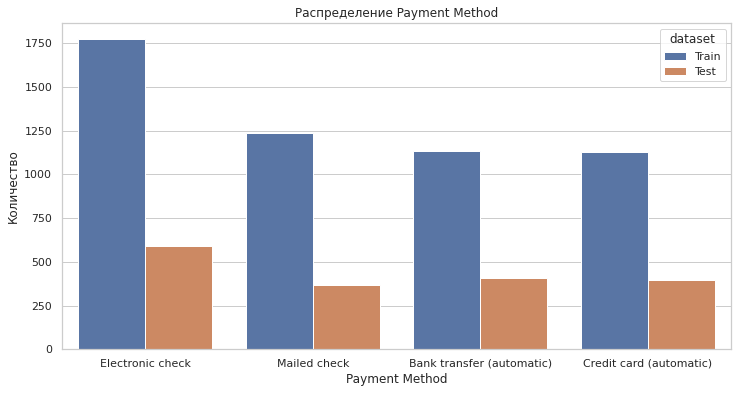

In [45]:
merged_df['dataset'] = 'Test'
merged_df.loc[features_train.index, 'dataset'] = 'Train'

# Визуализация для paymentmethod
plt.figure(figsize=(12, 6))
sns.countplot(x='paymentmethod', data=merged_df, hue='dataset')
plt.title('Распределение Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Количество')
plt.show()


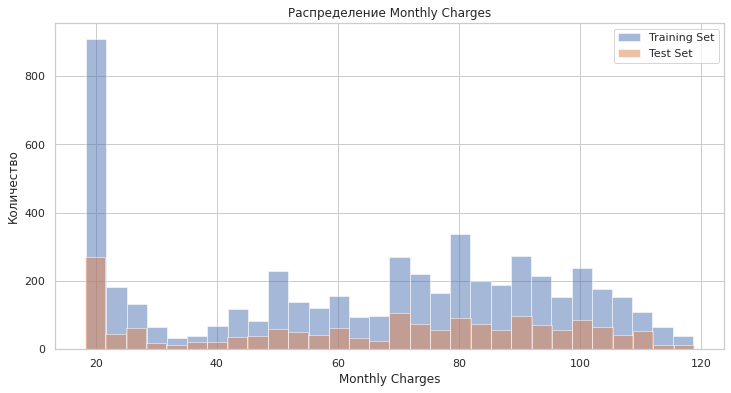

In [46]:
# Визуализация для monthlycharges
plt.figure(figsize=(12, 6))
plt.hist(features_train['monthlycharges'], bins=30, alpha=0.5, label='Training Set')
plt.hist(features_test['monthlycharges'], bins=30, alpha=0.5, label='Test Set')
plt.title('Распределение Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Количество')
plt.legend()
plt.show()

In [47]:
print('Распределение классов в обучающей выборке:')
print(target_train.value_counts(normalize=True))
print('Распределение классов в тестовой выборке:')
print(target_test.value_counts(normalize=True))

Распределение классов в обучающей выборке:
0    0.734168
1    0.265832
Name: leavingcustomer, dtype: float64
Распределение классов в тестовой выборке:
0    0.734357
1    0.265643
Name: leavingcustomer, dtype: float64


### Нормализация

In [48]:
# Выделение числовых признаков
numerical_features = features.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Выделение категориальных признаков
categorical_features = features.select_dtypes(include=['object', 'category']).columns.tolist()

# Вывод списков признаков
print("Числовые признаки:", numerical_features)
print("Категориальные признаки:", categorical_features)

Числовые признаки: ['monthlycharges', 'totalcharges', 'contractduration']
Категориальные признаки: ['type', 'paperlessbilling', 'paymentmethod', 'gender', 'seniorcitizen', 'partner', 'dependents', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'multiplelines', 'phone_service']


Маштабируем признаки

In [49]:
scaler = StandardScaler()
features_train[numerical_features] = scaler.fit_transform(features_train[numerical_features])
features_train[numerical_features].head(2)

/tmp/ipykernel_241/2314348631.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numerical_features] = scaler.fit_transform(features_train[numerical_features])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


monthlycharges  totalcharges  contractduration
customerID                                                
6772-WFQRD       -1.462421     -0.621296          0.319528
6204-IEUXJ        0.517426     -0.904427         -1.189999

In [50]:
features_train.shape

(5274, 19)

### Кодирование

Категориальные признаки кодируем методом OneHotEncoder для 'линейных' моделей и OrdinalEncoder для 'деревянных'.

In [51]:
encoder_ohe = OneHotEncoder(drop='first')  # Let the encoder automatically determine the categories
ohe_train = pd.DataFrame(encoder_ohe.fit_transform(features_train[categorical_features]).toarray(), index=features_train[numerical_features].index)
ohe_train = pd.concat([features_train[numerical_features], ohe_train], axis=1)
print(ohe_train.shape)
ohe_train.head(2)

(5274, 23)


monthlycharges  totalcharges  contractduration    0    1    2  \
customerID                                                                  
6772-WFQRD       -1.462421     -0.621296          0.319528  1.0  0.0  1.0   
6204-IEUXJ        0.517426     -0.904427         -1.189999  0.0  0.0  0.0   

              3    4    5    6  ...   10   11   12   13   14   15   16   17  \
customerID                      ...                                           
6772-WFQRD  0.0  0.0  0.0  1.0  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
6204-IEUXJ  1.0  0.0  0.0  0.0  ...  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0   

             18   19  
customerID            
6772-WFQRD  0.0  1.0  
6204-IEUXJ  0.0  1.0  

[2 rows x 23 columns]

In [52]:
#OE кодирование
ordinal_encoder = OrdinalEncoder()
encoded = ordinal_encoder.fit_transform(features_train[categorical_features]) 
oe_train = pd.DataFrame(encoded, columns=features_train[categorical_features].columns)
oe_train.index = target_train.index

oe_train = pd.concat([features_train[numerical_features], oe_train], axis=1)
print(oe_train.shape)
oe_train.head(2)

(5274, 19)


monthlycharges  totalcharges  contractduration  type  \
customerID                                                         
6772-WFQRD       -1.462421     -0.621296          0.319528   1.0   
6204-IEUXJ        0.517426     -0.904427         -1.189999   0.0   

            paperlessbilling  paymentmethod  gender  seniorcitizen  partner  \
customerID                                                                    
6772-WFQRD               1.0            0.0     1.0            0.0      0.0   
6204-IEUXJ               0.0            1.0     0.0            0.0      0.0   

            dependents  internetservice  onlinesecurity  onlinebackup  \
customerID                                                              
6772-WFQRD         1.0              2.0             0.0           0.0   
6204-IEUXJ         0.0              1.0             0.0           0.0   

            deviceprotection  techsupport  streamingtv  streamingmovies  \
customerID                                                                
6772-WFQRD               0.0          0.0          0.0              0.0   
6204-IEUXJ               1.0          1.0          0.0              0.0   

            multiplelines  phone_service  
customerID                                
6772-WFQRD            0.0            1.0  
6204-IEUXJ            0.0            1.0

In [53]:
ohe_train.columns = ohe_train.columns.astype(str)
ohe_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5274 entries, 6772-WFQRD to 3838-OZURD
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   monthlycharges    5274 non-null   float64
 1   totalcharges      5274 non-null   float64
 2   contractduration  5274 non-null   float64
 3   0                 5274 non-null   float64
 4   1                 5274 non-null   float64
 5   2                 5274 non-null   float64
 6   3                 5274 non-null   float64
 7   4                 5274 non-null   float64
 8   5                 5274 non-null   float64
 9   6                 5274 non-null   float64
 10  7                 5274 non-null   float64
 11  8                 5274 non-null   float64
 12  9                 5274 non-null   float64
 13  10                5274 non-null   float64
 14  11                5274 non-null   float64
 15  12                5274 non-null   float64
 16  13                5274 non-null 

## Обучение моделей 

Функция perform_grid_search предназначена для выполнения поиска по сетке (grid search) для оптимизации гиперпараметров модели машинного обучения. Она принимает следующие аргументы:

* model: Модель машинного обучения, для которой необходимо оптимизировать гиперпараметры.
* param_grid: Словарь или список словарей с гиперпараметрами, которые нужно протестировать.
* X_train: Набор данных для обучения (признаки).
* y_train: Целевая переменная для обучения.

Внутри функции выполняются следующие шаги:

* Используется GridSearchCV из библиотеки scikit-learn для выполнения поиска по сетке. Этот метод автоматически протестирует все комбинации гиперпараметров из param_grid на модели model, используя 5-кратную перекрестную проверку (cross-validation).
* Оценка модели производится с использованием метрики ROC AUC.
* После обучения GridSearchCV, функция выводит лучшие найденные гиперпараметры.
* Также выводятся средние значения ROC AUC и их стандартные отклонения для каждой комбинации гиперпараметров.
* В конце функция строит график, показывающий влияние различных комбинаций гиперпараметров на производительность модели, что помогает визуально оценить, какие параметры дают лучший результат.

Результат работы функции мы сохраняем в соответствующую модели перменную.

In [54]:
def perform_grid_search(model, param_grid, X_train, y_train):
    # Указываем, что хотим выбирать лучшую модель по метрике ROC AUC
    search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', refit='roc_auc')
    search.fit(X_train, y_train)

    # Выводим лучшие параметры, лучшее значение метрики и лучшую модель
    print(f"Лучшие параметры: {search.best_params_}")
    print(f"Лучшее значение ROC AUC: {search.best_score_:.3f}")
    print(f"Лучшая модель: {search.best_estimator_}")

    means = search.cv_results_['mean_test_score']
    stds = search.cv_results_['std_test_score']
    params = [str(p) for p in search.cv_results_['params']]

    for mean, std, param in zip(means, stds, params):
        print(f"{param} -> ROC AUC: {mean:.3f} (+/-{std * 2:.3f})")

    plt.figure(figsize=(10, 6))
    plt.errorbar(params, means, yerr=stds, fmt='o')
    plt.xlabel('Параметры модели')
    plt.ylabel('ROC AUC')
    plt.title('Кривая валидации')
    plt.xticks(rotation=45)
    plt.show()
    

    return search

Лучшие параметры: {'C': 10}
Лучшее значение ROC AUC: 0.848
Лучшая модель: LogisticRegression(C=10, max_iter=1000, n_jobs=-1, random_state=80124)
{'C': 1} -> ROC AUC: 0.848 (+/-0.020)
{'C': 10} -> ROC AUC: 0.848 (+/-0.020)
{'C': 100} -> ROC AUC: 0.848 (+/-0.020)


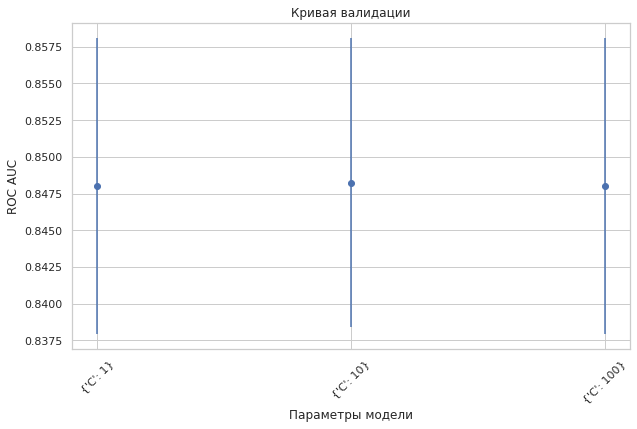

Лучшие параметры: {'max_depth': 10, 'n_estimators': 200}
Лучшее значение ROC AUC: 0.859
Лучшая модель: RandomForestClassifier(max_depth=10, n_estimators=200, random_state=80124)
{'max_depth': 10, 'n_estimators': 100} -> ROC AUC: 0.859 (+/-0.025)
{'max_depth': 10, 'n_estimators': 200} -> ROC AUC: 0.859 (+/-0.024)
{'max_depth': 20, 'n_estimators': 100} -> ROC AUC: 0.845 (+/-0.019)
{'max_depth': 20, 'n_estimators': 200} -> ROC AUC: 0.848 (+/-0.021)


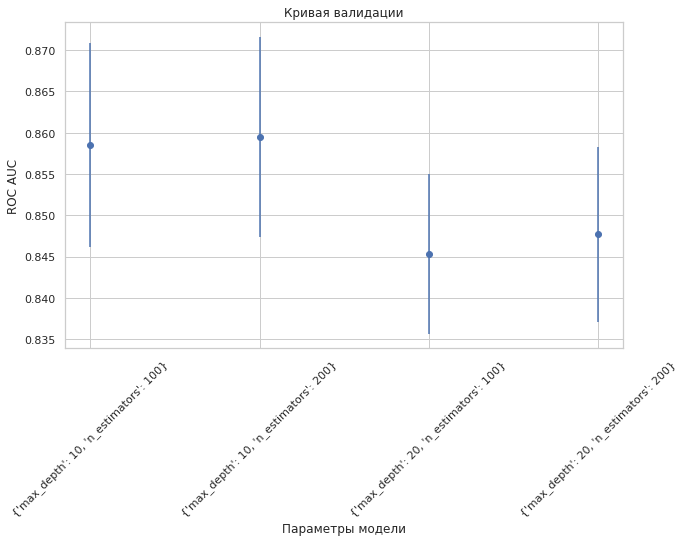

0:	learn: 0.6332487	total: 47.6ms	remaining: 42.8s
1:	learn: 0.5876335	total: 49.1ms	remaining: 22.1s
2:	learn: 0.5500706	total: 50.4ms	remaining: 15.1s
3:	learn: 0.5284096	total: 51.6ms	remaining: 11.6s
4:	learn: 0.5018547	total: 52.9ms	remaining: 9.47s
5:	learn: 0.4836200	total: 54.2ms	remaining: 8.08s
6:	learn: 0.4683880	total: 55.5ms	remaining: 7.07s
7:	learn: 0.4567082	total: 56.7ms	remaining: 6.32s
8:	learn: 0.4471252	total: 57.9ms	remaining: 5.73s
9:	learn: 0.4400661	total: 59.2ms	remaining: 5.27s
10:	learn: 0.4337209	total: 60.4ms	remaining: 4.88s
11:	learn: 0.4274120	total: 61.7ms	remaining: 4.56s
12:	learn: 0.4241060	total: 62.8ms	remaining: 4.29s
13:	learn: 0.4205465	total: 64ms	remaining: 4.05s
14:	learn: 0.4177249	total: 65.3ms	remaining: 3.85s
15:	learn: 0.4144041	total: 66.5ms	remaining: 3.67s
16:	learn: 0.4099879	total: 67.7ms	remaining: 3.51s
17:	learn: 0.4073556	total: 68.9ms	remaining: 3.38s
18:	learn: 0.4040160	total: 70.1ms	remaining: 3.25s
19:	learn: 0.4016445	tot

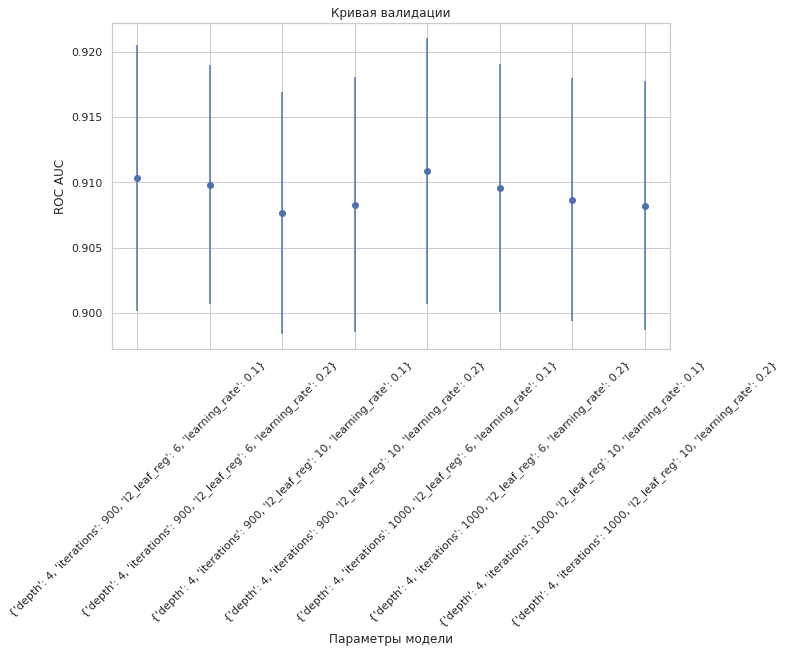

In [55]:
# Создание моделей
model_lr = LogisticRegression(solver='lbfgs', n_jobs=-1, max_iter=1000,random_state=RANDOM_STATE)
model_rf = RandomForestClassifier(random_state=RANDOM_STATE)
model_catboost = CatBoostClassifier(random_state=RANDOM_STATE, verbose=1)

# Параметры для разных моделей
param_grid_lr = {'C': [ 1, 10, 100]}
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
param_grid_catboost = {'learning_rate': [0.1, 0.2],'iterations': [900,1000],'l2_leaf_reg':[6,10],'depth':[4]}


# Вызов функции для каждой модели
# Для линейной модели используем данные с One-Hot Encoding
results_lr  = perform_grid_search(model_lr, param_grid_lr, ohe_train, target_train)
# Для модели случайного леса и CatBoost  используем данные с Ordinal Encoding
results_rf  = perform_grid_search(model_rf, param_grid_rf, oe_train, target_train)
results_catboost = perform_grid_search(model_catboost, param_grid_catboost, oe_train, target_train)

## Шаг. Выбор лучшей модели и оценка её качества

Функцию format_best_results принимает DataFrame результатов и возвращает строку с лучшими параметрами и средним значением ROC AUC, отформатированными для удобочитаемого вывода

In [56]:
# Сравниваем лучшие значения ROC AUC для трех моделей
best_score_lr = results_lr.best_score_
best_score_rf = results_rf.best_score_
best_score_catboost = results_catboost.best_score_

print(f"Лучшее значение ROC AUC для логистической регрессии: {best_score_lr:.4f}")
print(f"Лучшее значение ROC AUC для случайного леса: {best_score_rf:.4f}")
print(f"Лучшее значение ROC AUC для CatBoost: {best_score_catboost:.4f}")


Лучшее значение ROC AUC для логистической регрессии: 0.8482
Лучшее значение ROC AUC для случайного леса: 0.8595
Лучшее значение ROC AUC для CatBoost: 0.9109


In [57]:
# Кодирование категориальных признаков тестовой выборки
oe_test_cat = pd.DataFrame(ordinal_encoder.transform(features_test[categorical_features]), 
                           columns=features_test[categorical_features].columns)
oe_test_cat.index = features_test.index

# Конкатенация числовых и категориальных признаков
oe_test = pd.concat([features_test[numerical_features], oe_test_cat], axis=1)

# Нормализация числовых признаков тестовой выборки
oe_test[numerical_features] = scaler.transform(oe_test[numerical_features])

print(oe_test.shape)
oe_test.head(2)

(1758, 19)


monthlycharges  totalcharges  contractduration  type  \
customerID                                                         
2773-OVBPK        1.552120      2.360525          1.422851   2.0   
4915-BFSXL        0.147655      1.157322          1.544846   2.0   

            paperlessbilling  paymentmethod  gender  seniorcitizen  partner  \
customerID                                                                    
2773-OVBPK               1.0            0.0     1.0            0.0      1.0   
4915-BFSXL               0.0            1.0     1.0            0.0      1.0   

            dependents  internetservice  onlinesecurity  onlinebackup  \
customerID                                                              
2773-OVBPK         0.0              1.0             0.0           1.0   
4915-BFSXL         1.0              0.0             1.0           0.0   

            deviceprotection  techsupport  streamingtv  streamingmovies  \
customerID                                                                
2773-OVBPK               1.0          1.0          1.0              1.0   
4915-BFSXL               1.0          0.0          1.0              0.0   

            multiplelines  phone_service  
customerID                                
2773-OVBPK            1.0            1.0  
4915-BFSXL            1.0            1.0

In [58]:
# Используем лучшую модель, которая была найдена с помощью GridSearchCV
catboost_model = results_catboost.best_estimator_

# Оцениваем модель на тестовых данных
predictions = catboost_model.predict_proba(oe_test)[:, 1]
roc_auc = roc_auc_score(target_test, predictions)
print(f"ROC AUC на тестовых данных: {roc_auc:.4f}")


ROC AUC на тестовых данных: 0.9201


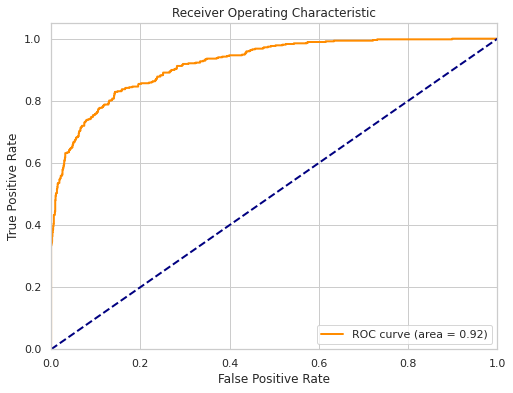

In [59]:
fpr, tpr, thresholds = roc_curve(target_test, predictions)
roc_auc = auc(fpr, tpr)

# Построение ROC AUC кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

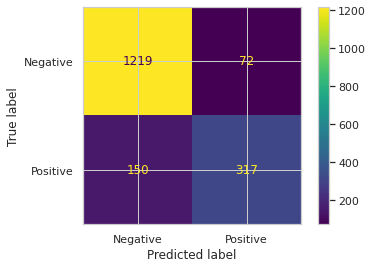

In [60]:
predictions_binary = np.where(predictions > 0.5, 1, 0)
# Матрица ошибок
cm = confusion_matrix(target_test, predictions_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot()
plt.show()

* Общая способность модели идентифицировать негативные случаи (TN) достаточно высока.
* Модель имеет определенное количество ложнопозитивных (FP) и ложнонегативных (FN) результатов, что может быть критично в зависимости от приложения.
* Важно учитывать контекст задачи при интерпретации этих результатов, особенно если стоимость ошибок FP и FN различна.

### Значимость признаков

На представленном графике показана важность различных признаков в модели CatBoost. Каждый столбец отображает вклад соответствующего признака в прогнозирование модели. Чем выше столбец, тем больше влияние признака на результаты модели. Эта информация может быть полезна для понимания того, какие факторы наиболее значимы при принятии решений и могут быть использованы для оптимизации будущих стратегий удержания клиентов.

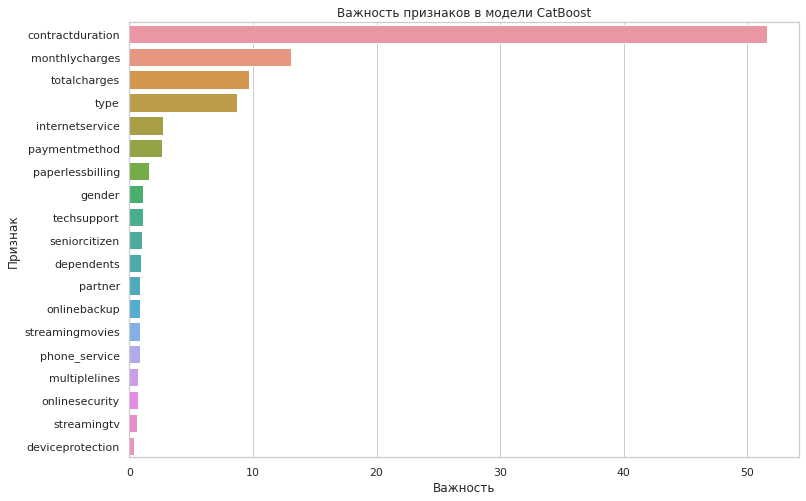

In [61]:
# Получаем важность признаков
feature_importances = catboost_model.get_feature_importance()
feature_names = oe_train.columns

# Создаем DataFrame для важности признаков
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Визуализируем важность признаков
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Важность признаков в модели CatBoost')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.show()

In [62]:
importances_df

Feature  Importance
2   contractduration   51.606137
0     monthlycharges   13.102106
1       totalcharges    9.637322
3               type    8.710889
10   internetservice    2.692211
5      paymentmethod    2.659123
4   paperlessbilling    1.607406
6             gender    1.103208
14       techsupport    1.089756
7      seniorcitizen    1.043130
9         dependents    0.958315
8            partner    0.882442
12      onlinebackup    0.868650
16   streamingmovies    0.857161
18     phone_service    0.836653
17     multiplelines    0.725083
11    onlinesecurity    0.710026
15       streamingtv    0.572641
13  deviceprotection    0.337741

1)Преобладающее влияние длительности контракта:

Признак contractduration (длительность контракта) имеет наибольшее влияние на модель, что указывает на то, что время, в течение которого клиент остается с компанией, является критически важным фактором в прогнозировании оттока. Это соответствует гипотезе о том, что более короткие контракты чаще расторгаются.

2)Средние месячные платежи и общие расходы:

monthlycharges (ежемесячные платежи) и totalcharges (общие расходы) также являются значительными факторами. Это подтверждает предположение о том, что финансовые факторы играют важную роль в решении клиентов об оттоке.

3)Тип оплаты и способ оплаты:

type (тип оплаты) и paymentmethod (способ оплаты) также важны, что подчеркивает влияние условий оплаты и предпочтений клиентов в способах оплаты на их решение об оттоке.

4)Интернет-услуги и дополнительные опции:

Признаки, связанные с интернет-услугами (internetservice, onlinesecurity, techsupport и т.д.), имеют меньшее, но всё же заметное влияние. Это может указывать на то, что качество и набор предоставляемых услуг также важны для понимания способов удержания клиентов.

5)Демографические признаки:

Признаки, такие как gender (пол), seniorcitizen (является ли клиент пенсионером), partner (наличие партнера) и dependents (наличие иждивенцев), имеют относительно меньшее влияние на прогноз оттока.

Эти результаты могут быть использованы для разработки стратегий удержания клиентов, фокусируясь на ключевых аспектах, таких как условия контракта, ценообразование, качество обслуживания и персонализация предложений в зависимости от демографических характеристик клиентов.

## Шаг. Общий вывод и рекомендации для заказчика

### Анализ оттока клиентов компании "ТелеДом" на основе исторических данных.

#### Проверка гипотез

На основании проведенного анализа данных, мы выделили четыре ключевые тенденции, которые могут влиять на решения клиентов о расторжении контрактов. Для более глубокого понимания этих тенденций, мы сформулируем четыре гипотезы, которые будут проверены статистически. Это позволит нам определить, являются ли наблюдаемые закономерности случайными или имеют достаточные основания для дальнейшего рассмотрения в стратегиях удержания клиентов

**Гипотеза 1.Ежемесячные платежи:**

* Нулевая гипотеза (H0_1): Средние ежемесячные платежи клиентов с расторгнутыми контрактами равны среднему по датасету.
* Альтернативная гипотеза (H1_1): Средние ежемесячные платежи клиентов с расторгнутыми контрактами выше среднего по датасету.

In [63]:
mean_monthly_charges = merged_df['monthlycharges'].mean()
t_stat, p_value = ttest_1samp(merged_df[merged_df['leavingcustomer'] == 1]['monthlycharges'], mean_monthly_charges)
print("Гипотеза 1 - Ежемесячные платежи:")
print("t-statistic:", t_stat, "p-value:", p_value)
if p_value < 0.05:
    print("Альтернативная гипотеза принимается.")
else:
    print("Нулевая гипотеза принимается.")

Гипотеза 1 - Ежемесячные платежи:
t-statistic: 16.9014023428954 p-value: 9.602639779028238e-60
Альтернативная гипотеза принимается.


**Гипотеза 2. Длительность контрактов:**

* Нулевая гипотеза (H0_2): Средняя длительность расторгнутых контрактов равна 10 месяцам.
* Альтернативная гипотеза (H1_2): Средняя длительность расторгнутых контрактов меньше 10 месяцев.

In [64]:
mean_monthly_charges = merged_df['monthlycharges'].mean()
t_stat, p_value = ttest_1samp(merged_df[merged_df['leavingcustomer'] == 1]['contractduration'], 300)
print("Гипотеза 2 - Длительность контрактов:")
print("t-statistic:", t_stat, "p-value:", p_value)
if p_value < 0.05:
    print("Альтернативная гипотеза принимается.")
else:
    print("Нулевая гипотеза принимается.")

Гипотеза 2 - Длительность контрактов:
t-statistic: 17.99073785007448 p-value: 7.291519506559345e-67
Альтернативная гипотеза принимается.


**Гипотеза 3.Тип оплаты:**

* Нулевая гипотеза (H0_3): Среди расторгнутых контрактов типы оплаты встречаются одинаково часто.
* Альтернативная гипотеза (H1_3): Ежемесячный тип оплаты чаще встречается среди расторгнутых контрактов

In [65]:
contingency_table = pd.crosstab(merged_df['type'], merged_df['leavingcustomer'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Гипотеза 3 - Тип оплаты:")
print("Chi-squared:", chi2, "p-value:", p)
if p_value < 0.05:
    print("Альтернативная гипотеза принимается.")
else:
    print("Нулевая гипотеза принимается.")

Гипотеза 3 - Тип оплаты:
Chi-squared: 1179.5458287339445 p-value: 7.326182186265472e-257
Альтернативная гипотеза принимается.


**Гипотеза 4.Общие расходы:**

* Нулевая гипотеза (H0_4): Средние общие расходы клиентов с расторгнутыми контрактами равны 710.
* Альтернативная гипотеза (H1_4): Средние общие расходы клиентов с расторгнутыми контрактами меньше 710.

In [66]:
mean_monthly_charges = merged_df['monthlycharges'].mean()
t_stat, p_value = ttest_1samp(merged_df[merged_df['leavingcustomer'] == 1]['totalcharges'], 710)
print("Гипотеза 4 - Общие расходы:")
print("t-statistic:", t_stat, "p-value:", p_value)
if p_value < 0.05:
    print("Альтернативная гипотеза принимается.")
else:
    print("Нулевая гипотеза принимается.")

Гипотеза 4 - Общие расходы:
t-statistic: 18.789613566631402 p-value: 2.785637852546536e-72
Альтернативная гипотеза принимается.


Целью данного анализа было выявление ключевых факторов, влияющих на решение клиентов о расторжении контрактов с компанией "ТелеДом". Изучение исторических данных позволило выявить несколько критических индикаторов, которые могут способствовать оттоку клиентов.

**Ключевые Находки**

1. Ежемесячные платежи: Обнаружено, что более 70% расторгнутых контрактов приходятся на клиентов с ежемесячной платой, превышающей среднее значение по датасету. Это может означать то, что большинство такие клиенты находятся в поиске оператора, который сможет предоставлять широкий спектр услуг по низким ценам.
2. Длительность контрактов: Более половины контрактов были расторгнуты в течение первых 10 месяцев с момента их заключения. Соответственно усилия по удержанию следует направить на новых клиентов.
3. Тип оплаты: Выявлено, что почти 90% оттока приходится на клиентов с ежемесячным типом оплаты. Такая аномальность может объяснять тем что one-two year контракты заключают в большинстве случаев ровно после таких же 'испытательных' сроков. Требуется дополнительный анализ в контектсе соответствующей информации.
4. Общие расходы: Половина расторжений контрактов происходит до того, как общая сумма расходов клиентов достигает 710 единиц.Это подчеркивает вышезамечаенные тенденции.


**Рекомендации**

На основе проведенного анализа можно предложить следующие действия для минимизации оттока клиентов:

* Пересмотр тарифной политики: 

Снижение ежемесячной платы может помочь удержать клиентов, особенно тех, кто склонен к расторжению контракта из-за высоких расходов.
* Внедрение стимулов для долгосрочных контрактов:

Разработка программ лояльности или предложение скидок для клиентов, заключающих контракты на более длительный срок, может уменьшить отток в первые месяцы.
* Анализ политики платежей:

Учитывая значительный отток среди клиентов с ежемесячной оплатой, стоит переосмыслить условия предоставления услуг, возможно, предложив более выгодные условия для перехода на годовые контракты.
* Индивидуальный подход к клиентам со средними и высокими общими расходами:

Необходимо разработать стратегии, направленные на увеличение вовлеченности и удовлетворенности клиентов, которые уходят, имея опыт пользования широким спектром услуг.

**Возможные аналитические шаги:**

* Сегментация данных: Для более детального понимания поведения клиентов и проверки гипотез, данные можно сегментировать по различным признакам, таким как возраст клиента, наличие партнера и детей, а также тип подключаемых услуг.
* Временной анализ: Исследовать, как изменения во времени (например, сезонность или экономические колебания) влияют на расторжение контрактов.
* Поведенческие факторы: Анализ влияния поведенческих факторов, таких как частота использования услуг и обратной связи с клиентской поддержкой, на вероятность оттока.

## Общий Вывод по Проекту "ТелеДом"

**Процесс Работы**

В рамках нашего проекта была выполнена комплексная работа по анализу и подготовке данных для построения модели прогнозирования оттока клиентов для компании "ТелеДом". Работа включала следующие этапы:

* Загрузка и Подготовка Данных: Инициализация необходимых библиотек и загрузка разнообразных датасетов.
* Исследовательский Анализ и Предобработка: Анализ размеров датасетов, типов данных и пропущенных значений; визуализация распределений и статистик; предобработка данных, включая обработку пропущенных значений и аномалий.
* Объединение Данных: Соединение различных датасетов в один общий датафрейм по ключу customerID.
* Повторный Анализ и Предобработка Объединенных Данных: Поиск и обработка дубликатов, корреляционный анализ, генерация новых признаков и исследование баланса классов.
* Подготовка Данных для Моделей Машинного Обучения: Разделение данных на обучающую и тестовую выборки, кодирование категориальных признаков и масштабирование количественных.
* Обучение Моделей и Подбор Гиперпараметров: Применение различных моделей машинного обучения и оптимизация их гиперпараметров через кросс-валидацию.
* Оценка Качества Моделей: Сравнение моделей на основе метрик, выбор лучшей модели и её тестирование.

**Ключевые Результаты**

1) Удалось обучить модель с обязательным для проекта показателем **ROC-AUC равным 0.92**.

2) Анализ помог сформултровать ключевые факторами связанные с оттоком клиентов.

**Рекомендации** 

Исходя из полученных результатов, рекомендуем следующее:

* Ревизия Тарифной Политики: Пересмотреть структуру тарифов, особенно для клиентов с месячным типом оплаты, и рассмотреть возможность введения лояльных предложений для снижения ежемесячных платежей.
* Стимулирование Долгосрочных Контрактов: Предложить дополнительные бонусы для стимулирования заключения более длительных контрактов.
* Аналитика Клиентского Поведения: Прододжать анализировать причины ранних расторжений контрактов и разработать индивидуальные предложения для удержания клиентов на начальном этапе сотрудничества.
* Оптимизация Маркетинговых Усилий: Сфокусировать маркетинг и услуги поддержки на клиентах с месячной оплатой, которые демонстрируют высокий риск оттока.

**Заключение**

В результате анализа можно утверждать - компания хорошо справляется с долгосрочными и качественными обязательствами - поэтому ей требуется сделать упор на пересмотр ценообразования: проведенный анализ подчеркивает важность финансовых факторов, таких как ежемесячная плата и общие расходы, а также типа оплаты контракта в контексте удержания клиентов. Используя эти данные, компания "ТелеДом" может разработать целенаправленные стратегии, чтобы предотвратить потерю клиентов и укрепить свои позиции на рынке.